### Prob Statement: Analyse and Create a selection criteria for most promising acquisition targets for Razor group 

#### Load Data and try and understand the context

In [176]:
### Import Libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [177]:
### Read file from the source given

df = pd.read_excel('Sample_Longlist_Data.xlsx')
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,NaN,NaN,NaN
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN,NaN,NaN
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,...,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN


### Analyse the basic details from the DF, and then clean the data. Also use the recommendations made in the probem statement: 
    1. Extract count from sellerproductcount
    2. Extract ratings and positive ratings from sellerratings
    3. Extract contact details from sellerdetails
    4. Filter out Chinese sellers for analysis
    5. See if we can use Hero product ratings in the analysis

In [178]:
df.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')

In [179]:
df.shape

(1839, 21)

In [180]:
df.drop(df.iloc[:,-3:], axis = 1, inplace = True)
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


### General steps of progress:

    1. Look and understand the problem we are trying to solve
    2. look and understand the data
    3. Define the problem in terms of metrics/measurable output
    4. Clean the data and apply relevant conditions to use it
    5. Model it into useable form
    6. Select the criterio to maximize/improve the metric chosen for success

##### General Steps to take care when cleaning the data :

    1. Look at the nulls and remove columns which are >30% nulls as these could cloud our analysis
    2. Try to impute the nulls/ remove rows where the nulls are very less
    3. Look for any other irregularity in column names/values/ the way nulls are displayed
    4. Perform basic data quality checks
    5. Look for outliers and either treat them or remove them for analysis
    
##### Post all these steps are completed create useable data models in the form of dataframes
   
    

### Identifying the prob and defining metrics of success

#### Brand/Seller Acquisition

###### 1. Number of positive ratings - tells us how much the brands are loved by the consumers
###### 2. Number of products listed - tells us how big the brands are and how many products they list (scale of business)
###### 3. Drop in negative ratings in the past 12 months - Are the brands reactive to customer feedback (and aiming for maximum customer retention )
###### 4. Count of ratings for top 2 products - Gives us a rough idea about how many customers does the brand have ( ratings could be estimated to be a scaled down number of actual customers)
###### 5. For how long is the seller in business - tells us the longevity of the brand ( which in turns potentially relates to trust it has from customers, and revenue it might have generated )
###### 6. Revenue of the brand - Tells us how big the brand is and is worth acquiring or not
###### 7. Profitability of the brand - Tells us the actual success story of a brand
###### 8. Number of products/features released in the past 1 yr, 2 yrs, 5 yrs - Shows the brand's innovation calibre and ambition/ability to expand to become a market leader across products

#### Note 1: There might be other metrics a business might look at for solving a problem, but here we look at the above 8 and try to measure them with the data provided and then try to improve them. Using these metrics we would also try to create a selection criterion/ recommendation engine for the brands that are woth acquiring

#### Note 2: There seems to be a possibility that all 8 of the metrics defined above might not be all derivable from the fields provided, and hence we decide to use whatever is present - 1, 2, 4 ; 3 and the last 4 metrics cannot be derived directly from the above data Therefore, descriptively the 5 metrics cannot be analyzed using the data



### Defining Metrics using data

##### 1. Number of positive ratings: This will be derived from sellerratings field and will be applicabe for the last 12 month period
##### 2. Number of product listed: This will be derived for sellerproductcount field
##### 4. Count of ratings for the top2 products: Sum of Hero product 1 - #ratings & Sum of Hero product 2 - #ratings

### Cleaning Data

 #### Step 1: Remove duplicates

In [181]:
df.drop_duplicates()
df.shape

(1839, 18)

##### No duplicates found as shape remains the same

In [182]:
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


#### Step 2: Cleaning the seller business name column to remove the prefix of Business Name:

In [183]:
df.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL'],
      dtype='object')

In [184]:
#### Removing business name as suffix

df[['name','seller name']] = df['seller business name'].str.split(':', expand = True )
df['seller business name'] = df['seller name']
df.drop(['name','seller name'], axis = 1, inplace = True)
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


#### Step 3: Extracting total poduct counts from sellerproductcount field

In [185]:
### Importing re library for using reg exp wheverer necessary
import re

In [186]:
### Trying to use reg exp, but this one looks easier to be done usin just the split function

def extract_count(text) :
    if str(text).lower() == 'nan':
        return text    
    else:
        regex = '[0-9]+'
        cnt = re.findall(regex, str(text))
        #if (cnt[0] == '1') && (cnt[0] == '16'): cnt.remove('1-16') 
        result = ''.join(cnt)
        return cnt
        
    
#df['sellerproductcount'] = df['sellerproductcount'].apply(lambda x: extract_count(x))

#df.head()


In [187]:
#### using the split function to get the total count of products listed

df['results'] = df['sellerproductcount'].str.split(' ').str[-2:]
df['sellerproductcount'] = df['results'].apply(lambda x : x[0] if str(x).lower()!= 'nan' else x)
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,results
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"100,000",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,"[100,000, results]"
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,NaN
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"2,000",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,"[2,000, results]"
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,123,NaN,7 days home life supermarket is committed to p...,Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,"[123, results]"
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1,000",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,"[1,000, results]"


In [188]:
df.drop(['results'], axis = 1 , inplace = True)
df.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL'],
      dtype='object')

In [189]:
### Converting the number 10,000 in comma'ed form to actual numbers which can be used in analysis

df['sellerproductcount'] = df['sellerproductcount'].apply(lambda x: int(x.replace(',','')) if str(x).lower()!= 'nan' else x )
df.head()


,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,2000.0,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,123.0,NaN,7 days home life supermarket is committed to p...,Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,1000.0,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


##### Here although we know that some of the seller product counts are over the number specified but for the sake of the case study we are taking those as whatever they have been specified in the column sellerproductcount, this would not really affect our analysis

#### Step 4: Cleaning the sellerratings field to extract total and positive ratings

In [190]:
df['sellerratings'].unique()

array(['88% positive in the last 12 months (118 ratings)',
       '90% positive in the last 12 months (566 ratings)',
       '85% positive in the last 12 months (75 ratings)', nan,
       '81% positive in the last 12 months (52 ratings)',
       '100% positive lifetime (4 total ratings)',
       '100% positive lifetime (3 total ratings)',
       '63% positive lifetime (8 total ratings)',
       '0% positive lifetime (1 total ratings)',
       '97% positive in the last 12 months (116 ratings)',
       '100% positive lifetime (2 total ratings)',
       '67% positive lifetime (9 total ratings)',
       '76% positive in the last 12 months (3721 ratings)',
       '92% positive in the last 12 months (181 ratings)',
       '100% positive in the last 12 months (10 ratings)',
       '88% positive in the last 12 months (3134 ratings)',
       '97% positive in the last 12 months (610 ratings)',
       '98% positive in the last 12 months (1488 ratings)',
       '79% positive in the last 12 months 

In [191]:
#### Extracting positive percentages by using a split() function

df['positive'] = df['sellerratings'].str.split('%').str[0]
df['positive'] = df['positive'].apply( lambda x: int(x) if str(x).lower() != 'nan' else x )
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,positive
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88.0
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,90.0
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,2000.0,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,85.0
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,123.0,NaN,7 days home life supermarket is committed to p...,Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,1000.0,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,81.0


In [192]:
### Finding total ratings count y extracting everything in a bracket using a reg exp 

df['total'] =  df['sellerratings'].apply(lambda x : re.findall(r'\(.*?\)',x) if str(x).lower() != 'nan' else x)
df.head()


,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,positive,total
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88.0,[(118 ratings)]
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,90.0,[(566 ratings)]
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,2000.0,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,85.0,[(75 ratings)]
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,123.0,NaN,7 days home life supermarket is committed to p...,Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,1000.0,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,81.0,[(52 ratings)]


In [193]:
## Figuring out how to extract actual number of ratings from the substring
df['total'][0][0]

'(118 ratings)'

In [194]:
## using another reg exp for extracting actual number for one of the fields
c = re.findall('[0-9]+',df['total'][0][0])[0]
c

'118'

In [195]:
### Extracing the actual count from the whoel column and creating another column for this

df['total_ratings_cnt'] =  df['total'].apply(lambda x : re.findall('[0-9]+',x[0])[0] if str(x).lower() != 'nan' else x)
df['total_ratings_cnt'] = df['total_ratings_cnt'].apply( lambda x: int(x) if str(x).lower() != 'nan' else x )

df.head()


,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,positive,total,total_ratings_cnt
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88.0,[(118 ratings)],118.0
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,90.0,[(566 ratings)],566.0
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,2000.0,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,85.0,[(75 ratings)],75.0
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,123.0,NaN,7 days home life supermarket is committed to p...,Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,...,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,1000.0,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,81.0,[(52 ratings)],52.0


In [196]:
#### Finding actual positive ratings from the total ratings

df['positive_ratings_cnt'] = round(df['positive']* df['total_ratings_cnt']/100)

df.head()


,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,positive,total,total_ratings_cnt,positive_ratings_cnt
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88.0,[(118 ratings)],118.0,104.0
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,90.0,[(566 ratings)],566.0,509.0
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,2000.0,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,85.0,[(75 ratings)],75.0,64.0
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,123.0,NaN,7 days home life supermarket is committed to p...,Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,...,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN,NaN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,1000.0,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,81.0,[(52 ratings)],52.0,42.0


##### Now we have 2 separate columns for total ratings and total positive ratings which wll help us for the analysis 

#### Step 5: Create an aggreagted column for sum of ratings for the top 2 products for each seller

In [197]:
df['top2_product_ratings_cnt'] = df['Hero Product 1 #ratings'] + df['Hero Product 2 #ratings']
df.head()


,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,positive,total,total_ratings_cnt,positive_ratings_cnt,top2_product_ratings_cnt
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88.0,[(118 ratings)],118.0,104.0,10830
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,90.0,[(566 ratings)],566.0,509.0,0
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,2000.0,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,85.0,[(75 ratings)],75.0,64.0,326
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,123.0,NaN,7 days home life supermarket is committed to p...,Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,...,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN,NaN,0
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,1000.0,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,81.0,[(52 ratings)],52.0,42.0,337


#### Step 6: Find our the seller country from businessaddress and then filter out anything that is from China as at present the operations are not in China

In [198]:
df['businessaddress'].unique()

array(['411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-1410US',
       '1a HandelsagenturLindenallee 2MalchowMecklenburg17213DE',
       'zhongnanshijicheng27zhuang1410haochongchuanqunantongshi226000CN',
       ...,
       'lankaoxianzhangjunmuzhenzhengzhuangcunerzukaifengshihenansheng475300CN',
       'bei san huan da ming gong jian cai shi changban cai D qu 15 pai 12 haoxi an shi wei yang qushan xi sheng710000CN',
       'honggutanxinquhuanandongerlu99haolongxiangyuan15#zhuzhaiyidanyuan601shinanchangshijiangxisheng330008CN'],
      dtype=object)

In [199]:
## Extracting country codes from the column

df['businessaddress'][2][-2:]

'CN'

In [200]:
### Creating colum with country codes for each seller

df['seller_country'] = df['businessaddress'].apply(lambda x : x[:][-2:] if str(x).lower() != 'nan' else x)
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,positive,total,total_ratings_cnt,positive_ratings_cnt,top2_product_ratings_cnt,seller_country
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88.0,[(118 ratings)],118.0,104.0,10830,US
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,90.0,[(566 ratings)],566.0,509.0,0,DE
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,2000.0,85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,nantongaohuanfangzhipinyouxiangongsi,zhongnanshijicheng27zhuang1410haochongchuanqun...,...,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,85.0,[(75 ratings)],75.0,64.0,326,CN
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,123.0,NaN,7 days home life supermarket is committed to p...,Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,...,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN,NaN,0,CN
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,1000.0,81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,shenzhenfeichangshangmeimaoyiyouxiangongsi,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,...,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,81.0,[(52 ratings)],52.0,42.0,337,CN


In [201]:
## Filtering out those rows which have CN as country code

df = df[df['seller_country'] != 'CN']
df.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,...,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL,positive,total,total_ratings_cnt,positive_ratings_cnt,top2_product_ratings_cnt,seller_country
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,100000.0,88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,...,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...,88.0,[(118 ratings)],118.0,104.0,10830,US
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,...,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...,90.0,[(566 ratings)],566.0,509.0,0,DE
5,2020-11-15,Garden,Seller 6,Seller 6-link,Seller 6-storefrontlink,28.0,NaN,7830jeff is committed to providing each custom...,NaN,NaN,...,3284,2944,Strata,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...,NaN,NaN,NaN,NaN,6228,NaN
14,2020-11-15,Garden,Seller 15,Seller 15-link,Seller 15-storefrontlink,919.0,97% positive in the last 12 months (116 ratings),Impressum\n \n Gesetzliche Anbieterkennung:\n ...,Oliver Mills,Kaiserstr.12Borgholzhausen33829DE,...,1446,921,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...,97.0,[(116 ratings)],116.0,113.0,2367,DE
19,2020-11-15,Garden,Seller 20,Seller 20-link,Seller 20-storefrontlink,NaN,76% positive in the last 12 months (3721 ratings),Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,ABC-Schnäppchenmarkt GmbH,Jösser Weg10Petershagen32469DE,...,0,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...,76.0,[(3721 ratings)],3721.0,2828.0,0,DE


In [202]:
### validating if the filter worked

df.shape

(602, 24)

#### Step 7: Modelling the data into different dataframes based on their usage and domain - we will create 3 different dataframes, one for seller profile, one for seller contact info and one for brand info. These 3 can be used wherever necessary. Ideally in real world, these should be stored in a normalized fashion ( with dimentional modelling constructs) since not all of these are analytical data sources. We have to keep only analytical and reporting fields in the de-normalized table

In [203]:
### Identifying columns and then modelling them to their correct DFs

df.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL', 'positive', 'total',
       'total_ratings_cnt', 'positive_ratings_cnt', 'top2_product_ratings_cnt',
       'seller_country'],
      dtype='object')

In [204]:
### All the seller related analytical and descriptive fields

seller_df = df[['Date Added', 'category','seller business name','sellerlink','Count of seller brands','sellerproductcount'
                ,'total_ratings_cnt','positive_ratings_cnt', 'top2_product_ratings_cnt',
               'Max % of negative seller ratings - last 30 days',
               'Max % of negative seller ratings - last 90 days',
               'Max % of negative seller ratings - last 12 months', 'seller_country']]
seller_df.head()


,Date Added,category,seller business name,sellerlink,Count of seller brands,sellerproductcount,total_ratings_cnt,positive_ratings_cnt,top2_product_ratings_cnt,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,seller_country
0,2020-11-15,Garden,Lohas Living Inc,Seller 1,16,100000.0,118.0,104.0,10830,17,11,12,US
1,2020-11-15,Garden,1a-Handelsagentur,Seller 2,0,NaN,566.0,509.0,0,2,2,9,DE
5,2020-11-15,Garden,NaN,Seller 6,13,28.0,NaN,NaN,6228,0,0,0,NaN
14,2020-11-15,Garden,Oliver Mills,Seller 15,15,919.0,116.0,113.0,2367,0,0,3,DE
19,2020-11-15,Garden,ABC-Schnäppchenmarkt GmbH,Seller 20,0,NaN,3721.0,2828.0,0,18,20,20,DE


In [205]:
### All the analytical and descriptive fields for brands if anyone wants to profile and analyse brand data

brand_df = df[['seller business name','sellerlink', 'Count of seller brands', 'Sample brand name', 'Sample Brand URL']]
brand_df.head()


,seller business name,sellerlink,Count of seller brands,Sample brand name,Sample Brand URL
0,Lohas Living Inc,Seller 1,16,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,1a-Handelsagentur,Seller 2,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
5,NaN,Seller 6,13,Strata,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
14,Oliver Mills,Seller 15,15,Unbekannt,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...
19,ABC-Schnäppchenmarkt GmbH,Seller 20,0,Visit the TFA Dostmann Store,https://www.amazon.de/-/en/stores/TFA+Dostmann...


In [206]:
### All the fields related to seller contact info and address details

seller_info_df = df[['Date Added', 'seller business name','sellerlink', 'sellerlink-url', 'sellerstorefront-url', 'businessaddress', 'sellerdetails','seller_country']]

seller_info_df.head()


,Date Added,seller business name,sellerlink,sellerlink-url,sellerstorefront-url,businessaddress,sellerdetails,seller_country
0,2020-11-15,Lohas Living Inc,Seller 1,Seller 1-link,Seller 1-storefrontlink,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,Lohas Living Inc James Mazzello US 845 3RD Ave...,US
1,2020-11-15,1a-Handelsagentur,Seller 2,Seller 2-link,Seller 2-storefrontlink,1a HandelsagenturLindenallee 2MalchowMecklenbu...,Herzlich Willkommen im Amazon Shop von 1a-Hand...,DE
5,2020-11-15,NaN,Seller 6,Seller 6-link,Seller 6-storefrontlink,NaN,7830jeff is committed to providing each custom...,NaN
14,2020-11-15,Oliver Mills,Seller 15,Seller 15-link,Seller 15-storefrontlink,Kaiserstr.12Borgholzhausen33829DE,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE
19,2020-11-15,ABC-Schnäppchenmarkt GmbH,Seller 20,Seller 20-link,Seller 20-storefrontlink,Jösser Weg10Petershagen32469DE,Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,DE


##### Seller info Df has a field sellerdetails which could broken down and contact details like email and phone number can be extracted using it

In [207]:
df['sellerdetails'].unique()

array(['Lohas Living Inc James Mazzello US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807  Email Address:jadgemaello@gmail.com James Mazzello  US 845 3RD Ave Fl 6 New York NY 10022-6630 +1208-964-6807 EIN:\xa030-0961431 \nThe European Commission provides for an Online Dispute Resolution Platform, which you can access here: https://ec.europa.eu/consumers/odr/\n\nPlease see the following link for the nationally appointed Alternative Dispute Resolution bodies contact details: https://webgate.ec.europa.eu/od...',
       'Herzlich Willkommen im Amazon Shop von 1a-Handelsagentur. Für Fragen stehen wir Ihnen gerne unter der 039932-829721 zur Verfügung. Sie können auch direkt eine E-Mail an info@1a-handelsagentur.de schreiben. Anschrift\n1a-handelsagentur.de\nAndre Burmeister\nLindenallee 2\n17213 Malchow\xa0Kontakt\nTel.: 039932 - 829721\xa0\nFax.: 039932 – 81417\xa0\nE-Mail: info@1a-handelsagentur.de\nInternet: www.1a-handelsagentur.de\n\nUmsatzsteueridentnummer: DE 223758473 \nWir b

#### Looking at the data i figured that the data is quite non standard and there is no pattern for any contact details or email details which could be used, so i am planning to use different reg exp for phone and emails to extract whatever info i am able to capture from the field

##### listing down the reg exp which we are going to use for data extraction for phone and email

In [208]:
###Phone reg exp sets

phone1 = '([0-9]+|\([0-9]+\))(\-)([0-9]+)'
phone2 = '(\d{4})(\-|\s)(\d{3}).(\d{4})'
phone3 = '(\d{5}).(\d{2}).(\d{3}).(\d{2})'
phone4 = '(\d{3}).(\d{3}).(\d{4})'
phone5 = '(\d{5}).(\d{7})'
phone6 = '(\d{12})'
phone7 = r'''((\\d{3}|\\(d{3}\\))?(\\s|-|\\.)?(\\d{3})(\\s|-|\\.)(\\d{4})(\\s*(ext|x|ext.)\\s*(\\d{2,5}))?)'''


In [209]:
## Email reg exp sets
email = """(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"""



In [210]:
### Using phone 1 reg exp and exctracting values
seller_info_df['phone1'] = seller_info_df['sellerdetails'].apply(lambda x : re.findall(phone1, x) if str(x).lower() != 'nan' else x)
seller_info_df['phone1'].head(20)

0     [(10022, -, 6630), (1208, -, 964), (10022, -, ...
1                                 [(039932, -, 829721)]
5                                                    []
14                                                   []
19                                                   []
20                                                   []
21                                                   []
22                                                   []
23                         [(99, -, 107), (8406, -, 0)]
24                                                   []
25                                                   []
26                                                   []
27                                                   []
30                                                   []
31                                                   []
32                                                   []
33    [(10169, -, 0499), (720, -, 532), (81, -, 3873...
34                                [(02262, -, 70

In [211]:
### Function for joining the values extracted using the reg exp function and creating a list and returning it

def join_list_elements(l):
    if str(l).lower() != 'nan':
        if len(l) > 0 :
            l = [''.join(l[i]) for i in range(0,len(l))]
        else: 
            l
    else:
        l
    return l

In [212]:
#### A list of values which can be used to derive phone numbers

seller_info_df['phone1'] = seller_info_df['phone1'].apply(join_list_elements)
seller_info_df['phone1'].head(20)

0     [10022-6630, 1208-964, 10022-6630, 1208-964, 3...
1                                       [039932-829721]
5                                                    []
14                                                   []
19                                                   []
20                                                   []
21                                                   []
22                                                   []
23                                     [99-107, 8406-0]
24                                                   []
25                                                   []
26                                                   []
27                                                   []
30                                                   []
31                                                   []
32                                                   []
33                    [10169-0499, 720-532, 81-3873597]
34                                      [02262-7

In [213]:
### A function to find the phone number out to the junk values. 
### Important thing to note here is we are filtering on numbers which are 
### only 9 letters long as both in Germany and US and other countries the mnimum length of phone numbers is 9 digits

def find_phone(l):
    if str(l).lower() != 'nan' :
        if len(l) >0:
            l2 = [len(i) for i in l]
            l = l[l2.index(max(l2))]
            if len(l) >= 9 :
                return l
            else:
                return np.nan
        else:
            return np.nan
    else:
        return l 
    

In [214]:
a = find_phone(seller_info_df['phone1'][0])

a

'10022-6630'

In [215]:
### Applying that functions and also replacing the - and converting the numbers in a standard form
seller_info_df['phone1'] = seller_info_df['phone1'].apply(find_phone)
seller_info_df['phone1'] = seller_info_df['phone1'].apply(lambda x: str(x).replace('-','') if str(x).lower()!= 'nan' else x )

seller_info_df['phone1'].head(20)

0        100226630
1     039932829721
5              NaN
14             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
30             NaN
31             NaN
32             NaN
33       101690499
34    022627075160
35             NaN
36             NaN
Name: phone1, dtype: object

In [216]:
#### Doing the same set of steps for phone 2 reg exp

seller_info_df['phone2'] = seller_info_df['sellerdetails'].apply(lambda x : re.findall(phone2, x) if str(x).lower() != 'nan' else x)
seller_info_df['phone2'] = seller_info_df['phone2'].apply(join_list_elements)
seller_info_df['phone2'] = seller_info_df['phone2'].apply(find_phone)
seller_info_df['phone2'] = seller_info_df['phone2'].apply(lambda x: str(x).replace('-','') if str(x).lower()!= 'nan' else x )


seller_info_df['phone2'].head(20)



0     12089646807
1             NaN
5             NaN
14            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
30            NaN
31            NaN
32            NaN
33            NaN
34            NaN
35            NaN
36            NaN
Name: phone2, dtype: object

In [217]:
### same steps for regexp phone 3

seller_info_df['phone3'] = seller_info_df['sellerdetails'].apply(lambda x : re.findall(phone3, x) if str(x).lower() != 'nan' else x)
seller_info_df['phone3'] = seller_info_df['phone3'].apply(join_list_elements)
seller_info_df['phone3'] = seller_info_df['phone3'].apply(find_phone)

seller_info_df['phone3'].head(20)


0              NaN
1              NaN
5              NaN
14             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25    042214577700
26             NaN
27             NaN
30             NaN
31             NaN
32             NaN
33             NaN
34             NaN
35             NaN
36             NaN
Name: phone3, dtype: object

In [218]:
### Same steps for reg exp phone 4

seller_info_df['phone4'] = seller_info_df['sellerdetails'].apply(lambda x : re.findall(phone4, x) if str(x).lower() != 'nan' else x)
seller_info_df['phone4'] = seller_info_df['phone4'].apply(join_list_elements)
seller_info_df['phone4'] = seller_info_df['phone4'].apply(find_phone)

seller_info_df['phone4'].head(20)


0     2089646807
1            NaN
5            NaN
14    0154008562
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25           NaN
26           NaN
27           NaN
30    0224259631
31           NaN
32           NaN
33    7205324411
34           NaN
35           NaN
36           NaN
Name: phone4, dtype: object

In [219]:
#### Phone 5 reg exp 

seller_info_df['phone5'] = seller_info_df['sellerdetails'].apply(lambda x : re.findall(phone5, x) if str(x).lower() != 'nan' else x)
seller_info_df['phone5'] = seller_info_df['phone5'].apply(join_list_elements)
seller_info_df['phone5'] = seller_info_df['phone5'].apply(find_phone)

seller_info_df['phone5'].head(20)

0              NaN
1              NaN
5              NaN
14             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
30             NaN
31             NaN
32             NaN
33             NaN
34    022627075160
35             NaN
36             NaN
Name: phone5, dtype: object

In [220]:
### Phone 6 reg exp 

seller_info_df['phone6'] = seller_info_df['sellerdetails'].apply(lambda x : re.findall(phone6, x) if str(x).lower() != 'nan' else x)
seller_info_df['phone6'] = seller_info_df['phone6'].apply(join_list_elements)
seller_info_df['phone6'] = seller_info_df['phone6'].apply(find_phone)

seller_info_df['phone6'].head(20)

0              NaN
1              NaN
5              NaN
14    015140008562
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
30    022342509631
31             NaN
32             NaN
33             NaN
34             NaN
35             NaN
36             NaN
Name: phone6, dtype: object

In [221]:
### phone 7 reg exp

seller_info_df['phone7'] = seller_info_df['sellerdetails'].apply(lambda x : re.findall(phone7, x) if str(x).lower() != 'nan' else x)
seller_info_df['phone7'] = seller_info_df['phone7'].apply(join_list_elements)
seller_info_df['phone7'] = seller_info_df['phone7'].apply(find_phone)

seller_info_df['phone7'].head(20)

0    NaN
1    NaN
5    NaN
14   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
30   NaN
31   NaN
32   NaN
33   NaN
34   NaN
35   NaN
36   NaN
Name: phone7, dtype: float64

In [222]:
seller_info_df.head()

,Date Added,seller business name,sellerlink,sellerlink-url,sellerstorefront-url,businessaddress,sellerdetails,seller_country,phone1,phone2,phone3,phone4,phone5,phone6,phone7
0,2020-11-15,Lohas Living Inc,Seller 1,Seller 1-link,Seller 1-storefrontlink,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,100226630,12089646807,NaN,2089646807,NaN,NaN,NaN
1,2020-11-15,1a-Handelsagentur,Seller 2,Seller 2-link,Seller 2-storefrontlink,1a HandelsagenturLindenallee 2MalchowMecklenbu...,Herzlich Willkommen im Amazon Shop von 1a-Hand...,DE,039932829721,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-11-15,NaN,Seller 6,Seller 6-link,Seller 6-storefrontlink,NaN,7830jeff is committed to providing each custom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2020-11-15,Oliver Mills,Seller 15,Seller 15-link,Seller 15-storefrontlink,Kaiserstr.12Borgholzhausen33829DE,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,NaN,NaN,NaN,0154008562,NaN,015140008562,NaN
19,2020-11-15,ABC-Schnäppchenmarkt GmbH,Seller 20,Seller 20-link,Seller 20-storefrontlink,Jösser Weg10Petershagen32469DE,Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
### Steps to combine all the reg exp into one which is the most accurate value of reg exp
col = ['phone1','phone2','phone3','phone4','phone5','phone6','phone7']
phone_list = seller_info_df[col].values.tolist()


In [224]:
### creating a list of values
seller_info_df['phone_list'] = phone_list
seller_info_df.head()

,Date Added,seller business name,sellerlink,sellerlink-url,sellerstorefront-url,businessaddress,sellerdetails,seller_country,phone1,phone2,phone3,phone4,phone5,phone6,phone7,phone_list
0,2020-11-15,Lohas Living Inc,Seller 1,Seller 1-link,Seller 1-storefrontlink,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,100226630,12089646807,NaN,2089646807,NaN,NaN,NaN,"[100226630, 12089646807, nan, 2089646807, nan,..."
1,2020-11-15,1a-Handelsagentur,Seller 2,Seller 2-link,Seller 2-storefrontlink,1a HandelsagenturLindenallee 2MalchowMecklenbu...,Herzlich Willkommen im Amazon Shop von 1a-Hand...,DE,039932829721,NaN,NaN,NaN,NaN,NaN,NaN,"[039932829721, nan, nan, nan, nan, nan, nan]"
5,2020-11-15,NaN,Seller 6,Seller 6-link,Seller 6-storefrontlink,NaN,7830jeff is committed to providing each custom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan]"
14,2020-11-15,Oliver Mills,Seller 15,Seller 15-link,Seller 15-storefrontlink,Kaiserstr.12Borgholzhausen33829DE,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,NaN,NaN,NaN,0154008562,NaN,015140008562,NaN,"[nan, nan, nan, 0154008562, nan, 015140008562,..."
19,2020-11-15,ABC-Schnäppchenmarkt GmbH,Seller 20,Seller 20-link,Seller 20-storefrontlink,Jösser Weg10Petershagen32469DE,Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan]"


In [225]:
#### Cleaning the NaN from the list
seller_info_df['cleaned_phone_list']  =  seller_info_df['phone_list'].apply (lambda x : [i for i in x if str(i).lower()!= 'nan'])
seller_info_df.head()                                                         
                                                             

,Date Added,seller business name,sellerlink,sellerlink-url,sellerstorefront-url,businessaddress,sellerdetails,seller_country,phone1,phone2,phone3,phone4,phone5,phone6,phone7,phone_list,cleaned_phone_list
0,2020-11-15,Lohas Living Inc,Seller 1,Seller 1-link,Seller 1-storefrontlink,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,100226630,12089646807,NaN,2089646807,NaN,NaN,NaN,"[100226630, 12089646807, nan, 2089646807, nan,...","[100226630, 12089646807, 2089646807]"
1,2020-11-15,1a-Handelsagentur,Seller 2,Seller 2-link,Seller 2-storefrontlink,1a HandelsagenturLindenallee 2MalchowMecklenbu...,Herzlich Willkommen im Amazon Shop von 1a-Hand...,DE,039932829721,NaN,NaN,NaN,NaN,NaN,NaN,"[039932829721, nan, nan, nan, nan, nan, nan]",[039932829721]
5,2020-11-15,NaN,Seller 6,Seller 6-link,Seller 6-storefrontlink,NaN,7830jeff is committed to providing each custom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan]",[]
14,2020-11-15,Oliver Mills,Seller 15,Seller 15-link,Seller 15-storefrontlink,Kaiserstr.12Borgholzhausen33829DE,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,NaN,NaN,NaN,0154008562,NaN,015140008562,NaN,"[nan, nan, nan, 0154008562, nan, 015140008562,...","[0154008562, 015140008562]"
19,2020-11-15,ABC-Schnäppchenmarkt GmbH,Seller 20,Seller 20-link,Seller 20-storefrontlink,Jösser Weg10Petershagen32469DE,Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan]",[]


In [226]:
### Extracting the most suitable phone number from the list 
###- highest len one since there were some fax numbers as well which were smaller so longest is the phone number

seller_info_df['phone'] = seller_info_df['cleaned_phone_list'].apply(lambda x : max(x, key = len) if len(x)!= 0 else np.nan)
seller_info_df.head()

,Date Added,seller business name,sellerlink,sellerlink-url,sellerstorefront-url,businessaddress,sellerdetails,seller_country,phone1,phone2,phone3,phone4,phone5,phone6,phone7,phone_list,cleaned_phone_list,phone
0,2020-11-15,Lohas Living Inc,Seller 1,Seller 1-link,Seller 1-storefrontlink,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,100226630,12089646807,NaN,2089646807,NaN,NaN,NaN,"[100226630, 12089646807, nan, 2089646807, nan,...","[100226630, 12089646807, 2089646807]",12089646807
1,2020-11-15,1a-Handelsagentur,Seller 2,Seller 2-link,Seller 2-storefrontlink,1a HandelsagenturLindenallee 2MalchowMecklenbu...,Herzlich Willkommen im Amazon Shop von 1a-Hand...,DE,039932829721,NaN,NaN,NaN,NaN,NaN,NaN,"[039932829721, nan, nan, nan, nan, nan, nan]",[039932829721],039932829721
5,2020-11-15,NaN,Seller 6,Seller 6-link,Seller 6-storefrontlink,NaN,7830jeff is committed to providing each custom...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan]",[],NaN
14,2020-11-15,Oliver Mills,Seller 15,Seller 15-link,Seller 15-storefrontlink,Kaiserstr.12Borgholzhausen33829DE,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,NaN,NaN,NaN,0154008562,NaN,015140008562,NaN,"[nan, nan, nan, 0154008562, nan, 015140008562,...","[0154008562, 015140008562]",015140008562
19,2020-11-15,ABC-Schnäppchenmarkt GmbH,Seller 20,Seller 20-link,Seller 20-storefrontlink,Jösser Weg10Petershagen32469DE,Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, nan, nan, nan, nan]",[],NaN


In [227]:
### Dropping all the unnecessary columns

dropped = ['phone1','phone2','phone3','phone4','phone5','phone6','phone7','phone_list','cleaned_phone_list']
seller_info_df.drop(dropped,axis = 1, inplace = True)
seller_info_df.head()

,Date Added,seller business name,sellerlink,sellerlink-url,sellerstorefront-url,businessaddress,sellerdetails,seller_country,phone
0,2020-11-15,Lohas Living Inc,Seller 1,Seller 1-link,Seller 1-storefrontlink,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,12089646807
1,2020-11-15,1a-Handelsagentur,Seller 2,Seller 2-link,Seller 2-storefrontlink,1a HandelsagenturLindenallee 2MalchowMecklenbu...,Herzlich Willkommen im Amazon Shop von 1a-Hand...,DE,039932829721
5,2020-11-15,NaN,Seller 6,Seller 6-link,Seller 6-storefrontlink,NaN,7830jeff is committed to providing each custom...,NaN,NaN
14,2020-11-15,Oliver Mills,Seller 15,Seller 15-link,Seller 15-storefrontlink,Kaiserstr.12Borgholzhausen33829DE,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,015140008562
19,2020-11-15,ABC-Schnäppchenmarkt GmbH,Seller 20,Seller 20-link,Seller 20-storefrontlink,Jösser Weg10Petershagen32469DE,Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,DE,NaN


In [228]:
### Using Email reg exp to find the email ID from the list

seller_info_df['email1'] = seller_info_df['sellerdetails'].apply(lambda x : re.findall(email, x) if str(x).lower() != 'nan' else x)
seller_info_df['email1'].head(20)

0                               [jadgemaello@gmail.com]
1     [info@1a-handelsagentur.de, info@1a-handelsage...
5                                                    []
14                             [webmaster@9pm-store.de]
19                                   [abc-markt@web.de]
20                                                   []
21              [support@bauguru.at, office@bauguru.at]
22                                                   []
23                        [bib.beckum@blumenbecker.com]
24                                                   []
25                               [amazon@boni-shop.com]
26                                                   []
27                                                   []
30                            [info@deinegartenwelt.de]
31                                                   []
32                                                   []
33                                [ranaryvin@gmail.com]
34                               [amazon@hockdes

In [229]:

### Cleaning email ID so actually have emails in a list format
seller_info_df['email_cleaned'] = seller_info_df['email1'].apply(lambda x : x if  str(x).lower()!= 'nan' else [])



In [230]:
seller_info_df['email'] = seller_info_df['email_cleaned'].apply(lambda x : x[0] if len(x)>0 else np.nan)
seller_info_df.head()

,Date Added,seller business name,sellerlink,sellerlink-url,sellerstorefront-url,businessaddress,sellerdetails,seller_country,phone,email1,email_cleaned,email
0,2020-11-15,Lohas Living Inc,Seller 1,Seller 1-link,Seller 1-storefrontlink,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,12089646807,[jadgemaello@gmail.com],[jadgemaello@gmail.com],jadgemaello@gmail.com
1,2020-11-15,1a-Handelsagentur,Seller 2,Seller 2-link,Seller 2-storefrontlink,1a HandelsagenturLindenallee 2MalchowMecklenbu...,Herzlich Willkommen im Amazon Shop von 1a-Hand...,DE,039932829721,"[info@1a-handelsagentur.de, info@1a-handelsage...","[info@1a-handelsagentur.de, info@1a-handelsage...",info@1a-handelsagentur.de
5,2020-11-15,NaN,Seller 6,Seller 6-link,Seller 6-storefrontlink,NaN,7830jeff is committed to providing each custom...,NaN,NaN,[],[],NaN
14,2020-11-15,Oliver Mills,Seller 15,Seller 15-link,Seller 15-storefrontlink,Kaiserstr.12Borgholzhausen33829DE,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,015140008562,[webmaster@9pm-store.de],[webmaster@9pm-store.de],webmaster@9pm-store.de
19,2020-11-15,ABC-Schnäppchenmarkt GmbH,Seller 20,Seller 20-link,Seller 20-storefrontlink,Jösser Weg10Petershagen32469DE,Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,DE,NaN,[abc-markt@web.de],[abc-markt@web.de],abc-markt@web.de


In [231]:
### Dropping unnecessary columns

seller_info_df.drop(['email1','email_cleaned'], axis = 1, inplace = True)
seller_info_df.head()

,Date Added,seller business name,sellerlink,sellerlink-url,sellerstorefront-url,businessaddress,sellerdetails,seller_country,phone,email
0,2020-11-15,Lohas Living Inc,Seller 1,Seller 1-link,Seller 1-storefrontlink,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,Lohas Living Inc James Mazzello US 845 3RD Ave...,US,12089646807,jadgemaello@gmail.com
1,2020-11-15,1a-Handelsagentur,Seller 2,Seller 2-link,Seller 2-storefrontlink,1a HandelsagenturLindenallee 2MalchowMecklenbu...,Herzlich Willkommen im Amazon Shop von 1a-Hand...,DE,039932829721,info@1a-handelsagentur.de
5,2020-11-15,NaN,Seller 6,Seller 6-link,Seller 6-storefrontlink,NaN,7830jeff is committed to providing each custom...,NaN,NaN,NaN
14,2020-11-15,Oliver Mills,Seller 15,Seller 15-link,Seller 15-storefrontlink,Kaiserstr.12Borgholzhausen33829DE,Impressum\n \n Gesetzliche Anbieterkennung:\n ...,DE,015140008562,webmaster@9pm-store.de
19,2020-11-15,ABC-Schnäppchenmarkt GmbH,Seller 20,Seller 20-link,Seller 20-storefrontlink,Jösser Weg10Petershagen32469DE,Impressum: ABC-Schnäppchenmarkt GmbH \n Jösser...,DE,NaN,abc-markt@web.de


#### So we have 3 important tables/ Dfs in this case which are modelled to hold the data based on the their requirement of analytics and reporting - 

##### 1. Seller DF - Has all the seller related analytical fields, which can be used for any predictive modelling
##### 2. Brand DF - Has all the brand related fields in the case where someone wants to query brand related metrics
##### 3. Seller Info DF - It has all the seller contact info fields useful for our team to reach out to sellers

### Looking at the seller DF and clean it further before analysing the data

### Data Preparation

#### Identiying columns with nulls first and see if we need to do any treatment

In [232]:
seller_df.head()

,Date Added,category,seller business name,sellerlink,Count of seller brands,sellerproductcount,total_ratings_cnt,positive_ratings_cnt,top2_product_ratings_cnt,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,seller_country
0,2020-11-15,Garden,Lohas Living Inc,Seller 1,16,100000.0,118.0,104.0,10830,17,11,12,US
1,2020-11-15,Garden,1a-Handelsagentur,Seller 2,0,NaN,566.0,509.0,0,2,2,9,DE
5,2020-11-15,Garden,NaN,Seller 6,13,28.0,NaN,NaN,6228,0,0,0,NaN
14,2020-11-15,Garden,Oliver Mills,Seller 15,15,919.0,116.0,113.0,2367,0,0,3,DE
19,2020-11-15,Garden,ABC-Schnäppchenmarkt GmbH,Seller 20,0,NaN,3721.0,2828.0,0,18,20,20,DE


##### Defining some standard functions here which will be used for the analysis through out the notebook

In [233]:
#### Function for counting the percentage of nulls in the columns

def count_null_perc (df):
    return df.isnull().sum()/len(df)*100
    
    
#### Function for counting the number of nulls in the columns

def count_nulls(df):
    return df.isnull().sum()

#### Function to count the number of instances occuring/ distribution of the values

def count_value(df, col):
    return df[col].value_counts()

In [234]:
## Checking null counts

count_nulls(seller_df)

Date Added                                             0
category                                               0
seller business name                                  56
sellerlink                                             0
Count of seller brands                                 0
sellerproductcount                                   121
total_ratings_cnt                                     43
positive_ratings_cnt                                  43
top2_product_ratings_cnt                               0
Max % of negative seller ratings - last 30 days        0
Max % of negative seller ratings - last 90 days        0
Max % of negative seller ratings - last 12 months      0
seller_country                                        75
dtype: int64

In [235]:
## Percentage of nulls from our total rows
count_null_perc(seller_df)

Date Added                                            0.000000
category                                              0.000000
seller business name                                  9.302326
sellerlink                                            0.000000
Count of seller brands                                0.000000
sellerproductcount                                   20.099668
total_ratings_cnt                                     7.142857
positive_ratings_cnt                                  7.142857
top2_product_ratings_cnt                              0.000000
Max % of negative seller ratings - last 30 days       0.000000
Max % of negative seller ratings - last 90 days       0.000000
Max % of negative seller ratings - last 12 months     0.000000
seller_country                                       12.458472
dtype: float64

In [236]:
 seller_df['sellerlink'].value_counts().unique()


array([1])

##### This tells us the data is at a sellerlink level and we do not have multiple rows with same sellerlink, this could be used as a key for any analysis if required.  More so because even business name field has nulls so this being the identifier for each seller 

In [237]:
### Distribution of Category column

count_value(seller_df,'category')

Garden    602
Name: category, dtype: int64

##### This data consists only garden category

In [238]:
## Distribution of Date Added column

count_value(seller_df,'Date Added')

2020-11-15    602
Name: Date Added, dtype: int64

##### This data consists for data only for 2020-11-15

In [239]:
## Distribution of Seller Country column


count_value(seller_df,'seller_country')

DE    364
GB     47
IT     25
ES     15
US     14
NL     12
FR     11
HK     10
AT      8
PL      5
IN      4
IE      2
CZ      2
JP      2
CH      1
TH      1
PT      1
BE      1
SE      1
AU      1
Name: seller_country, dtype: int64

##### Most of the sellers listed are from germany, followed by Great Britain and Italy

In [240]:
## checking the overall statistic measures for the numerical columns
seller_df.describe()

,Count of seller brands,sellerproductcount,total_ratings_cnt,positive_ratings_cnt,top2_product_ratings_cnt,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months
count,602.000000,481.000000,559.000000,559.000000,602.000000,602.000000,602.000000,602.000000
mean,9.513289,6538.110187,462.515206,431.864043,6381.823920,5.310631,5.735880,7.303987
std,6.736593,18662.725294,1824.115487,1721.627846,16354.940135,14.626857,12.610972,13.999249
min,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,257.000000,21.000000,18.000000,7.250000,0.000000,0.000000,0.000000
50%,14.000000,898.000000,82.000000,75.000000,725.500000,0.000000,0.000000,3.000000
75%,15.000000,3000.000000,280.000000,262.500000,4612.250000,3.000000,6.000000,8.000000
max,16.000000,200000.000000,37124.000000,35268.000000,148446.000000,100.000000,100.000000,100.000000


#### The aim to check this was to get an idea of variation in sellerproductcount column where there are 20% nulls, we are looking at the tecjniques to possibly fill those nulls using various methods. A mean/median method could be used to fill the NaN values. But we see that the data is quite varied as 75% is 3000 and max value is 200000. So using median would be a better method to impute the values. But the issue is with so manuy rows being null it is not a wise decision to impute them all

##### Before we could do any imputation lets look at the population where the seller names are missing

In [241]:
name_null = seller_df[seller_df['seller business name'].isna()]
name_null.shape

(56, 13)

In [242]:
count_nulls(name_null)

Date Added                                            0
category                                              0
seller business name                                 56
sellerlink                                            0
Count of seller brands                                0
sellerproductcount                                   28
total_ratings_cnt                                    34
positive_ratings_cnt                                 34
top2_product_ratings_cnt                              0
Max % of negative seller ratings - last 30 days       0
Max % of negative seller ratings - last 90 days       0
Max % of negative seller ratings - last 12 months     0
seller_country                                       56
dtype: int64

##### Here we see that for sellers where the seller names are missing, half of the product counts and more than half of the ratings are missings, also all of the sellers which do not have their names, we do not even know the country, so for the scope of this analysis it would be good to remove the rows with null seller names as by doing this we can make out overall data set cleaner and more robust for analysis

In [243]:
seller_df.shape

(602, 13)

In [244]:
### removing the null seller name rows from the seller_df

seller_df = seller_df.dropna(subset = ['seller business name'])
seller_df.shape

(546, 13)

In [245]:
## Checking the composition of nulls again

count_null_perc(seller_df)

Date Added                                            0.000000
category                                              0.000000
seller business name                                  0.000000
sellerlink                                            0.000000
Count of seller brands                                0.000000
sellerproductcount                                   17.032967
total_ratings_cnt                                     1.648352
positive_ratings_cnt                                  1.648352
top2_product_ratings_cnt                              0.000000
Max % of negative seller ratings - last 30 days       0.000000
Max % of negative seller ratings - last 90 days       0.000000
Max % of negative seller ratings - last 12 months     0.000000
seller_country                                        3.479853
dtype: float64

In [246]:
seller_df.describe()

,Count of seller brands,sellerproductcount,total_ratings_cnt,positive_ratings_cnt,top2_product_ratings_cnt,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months
count,546.000000,453.000000,537.000000,537.000000,546.000000,546.000000,546.000000,546.000000
mean,10.128205,6061.002208,481.188082,449.325885,6904.970696,5.855311,5.866300,6.919414
std,6.542876,18184.805176,1858.787462,1754.392968,16959.765717,15.255594,11.660113,11.721732
min,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,248.000000,24.000000,22.000000,60.250000,0.000000,0.000000,1.000000
50%,14.000000,854.000000,90.000000,83.000000,1063.500000,0.000000,1.000000,3.000000
75%,15.000000,3000.000000,303.000000,287.000000,5874.250000,5.000000,7.000000,8.000000
max,16.000000,200000.000000,37124.000000,35268.000000,148446.000000,100.000000,100.000000,100.000000


In [247]:
### Finding the distribution of countries from where the sellers are in percentage
count_value(seller_df,'seller_country')/len(seller_df)*100

DE    66.666667
GB     8.608059
IT     4.578755
ES     2.747253
US     2.564103
NL     2.197802
FR     2.014652
HK     1.831502
AT     1.465201
PL     0.915751
IN     0.732601
IE     0.366300
CZ     0.366300
JP     0.366300
CH     0.183150
TH     0.183150
PT     0.183150
BE     0.183150
SE     0.183150
AU     0.183150
Name: seller_country, dtype: float64

#### Since the seller listed are mostly from Germany, with very few nulls, we should group the countries onto something a bit more systematic to analyse, and in order to create this a categorical variable we would just keep Germany, Great Britain and Italy and classify the rest as Others

In [248]:
### Changing the rest of the countries to Others

seller_df['seller_country'] = seller_df['seller_country'].apply(lambda x : x if x in (['DE','GB','IT']) else 'Others')
count_value(seller_df,'seller_country')



DE        364
Others    110
GB         47
IT         25
Name: seller_country, dtype: int64

In [249]:
seller_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 546 entries, 0 to 1815
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         546 non-null    datetime64[ns]
 1   category                                           546 non-null    object        
 2   seller business name                               546 non-null    object        
 3   sellerlink                                         546 non-null    object        
 4   Count of seller brands                             546 non-null    int64         
 5   sellerproductcount                                 453 non-null    float64       
 6   total_ratings_cnt                                  537 non-null    float64       
 7   positive_ratings_cnt                               537 non-null    float64       
 8   top2_product_rating

<AxesSubplot:xlabel='sellerproductcount'>

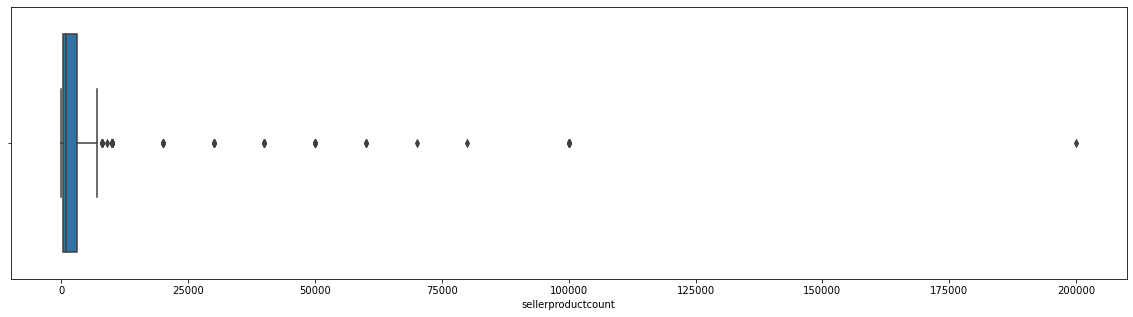

In [250]:
plt.figure(figsize = (20,5))
sns.boxplot(seller_df['sellerproductcount'])

#### We see not a lot of outliers but whatever outliers there are lets try to handle them as they are skewing the results and might impact any of our categorization algorithm if we want to use. We would use statistical IQR  to handle the outliers with 90% as the upper bound. 90 percentile is used because there would not be substantial data loss and this would handle all the outliers as well. But before doing that lets handle the nulls by imputing the median product count

In [251]:
seller_df['sellerproductcount'].fillna(seller_df['sellerproductcount'].median(), inplace = True)
count_nulls(seller_df)

Date Added                                           0
category                                             0
seller business name                                 0
sellerlink                                           0
Count of seller brands                               0
sellerproductcount                                   0
total_ratings_cnt                                    9
positive_ratings_cnt                                 9
top2_product_ratings_cnt                             0
Max % of negative seller ratings - last 30 days      0
Max % of negative seller ratings - last 90 days      0
Max % of negative seller ratings - last 12 months    0
seller_country                                       0
dtype: int64

#### Before proceeding forward with cleaning other columns lets first remove outliers and create a common function to find IQR and statistical quantiles

In [252]:
#### Function for calculating Quantiles and IQR

upper_bound = 0.90
lower_bound = 0.10

def iqr(df,col):
    Q1 = df[col].quantile(lower_bound)
    Q2 = df[col].quantile(upper_bound)
    IQR = Q2-Q1
    
    return Q1, Q2, IQR
    

In [253]:
seller_df.shape

(546, 13)

In [254]:
### Removing outliers from sellerproductcount field
Q1, Q2, IQR = iqr(seller_df, 'sellerproductcount')
seller_df = seller_df [seller_df['sellerproductcount'] <= Q2 + 1.5*IQR]
seller_df.shape

(517, 13)

<AxesSubplot:xlabel='sellerproductcount'>

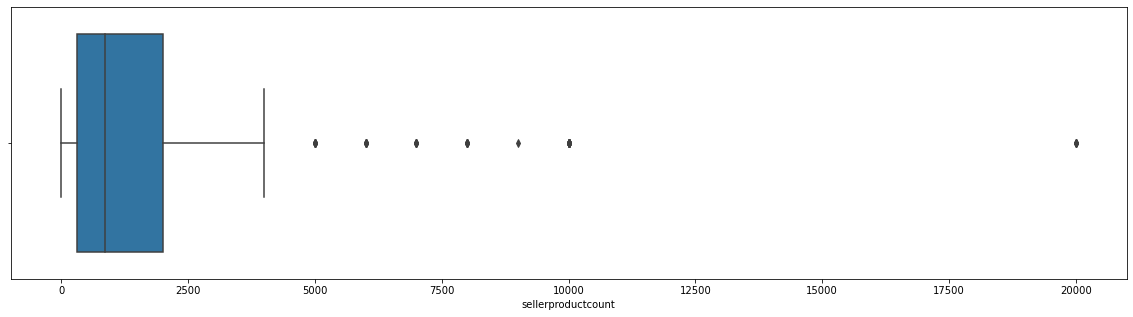

In [255]:
### Plotting the box plot again to visualize the outliers
plt.figure(figsize = (20,5))
sns.boxplot(seller_df['sellerproductcount'])

#### Moving on to total_ratings_cnt and positive_ratings_cnt to check for nulls and impute them. We would also do outlier analysis for them

<AxesSubplot:xlabel='total_ratings_cnt'>

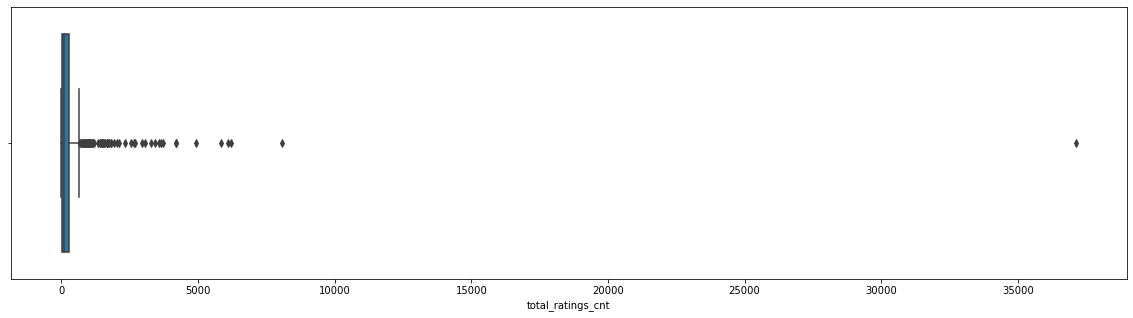

In [256]:
plt.figure(figsize = (20,5))
sns.boxplot(seller_df['total_ratings_cnt'])

<AxesSubplot:xlabel='positive_ratings_cnt'>

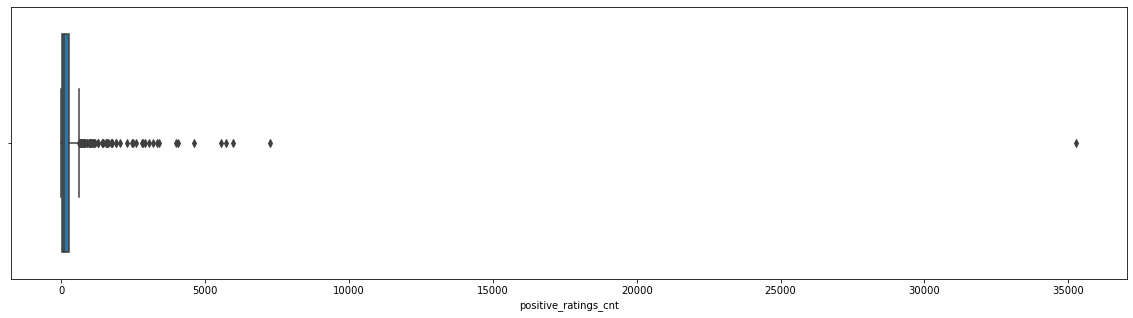

In [257]:
plt.figure(figsize = (20,5))
sns.boxplot(seller_df['positive_ratings_cnt'])

##### We see quite a lot of outliers and we would have to treat them, but for whatever small number of nulls values are there, lets impute them using median

In [258]:
### Imputing the total_ratings_cnt
seller_df['total_ratings_cnt'].fillna(seller_df['total_ratings_cnt'].median(), inplace = True)


#### Imputing the positive_ratings_cnt

seller_df['positive_ratings_cnt'].fillna(seller_df['positive_ratings_cnt'].median(), inplace = True)


count_nulls(seller_df)


Date Added                                           0
category                                             0
seller business name                                 0
sellerlink                                           0
Count of seller brands                               0
sellerproductcount                                   0
total_ratings_cnt                                    0
positive_ratings_cnt                                 0
top2_product_ratings_cnt                             0
Max % of negative seller ratings - last 30 days      0
Max % of negative seller ratings - last 90 days      0
Max % of negative seller ratings - last 12 months    0
seller_country                                       0
dtype: int64

#### Hence, there are no more nulls in the columns, this helps us immensely in correctly analyzing the data without loosing much data

##### Moving onto outlier handling now

In [259]:
### Removing outliers from total_ratings_cnt field
Q1, Q2, IQR = iqr(seller_df, 'total_ratings_cnt')
seller_df = seller_df [seller_df['total_ratings_cnt'] <= Q2 + 1.5*IQR]
seller_df.shape

(498, 13)

<AxesSubplot:xlabel='total_ratings_cnt'>

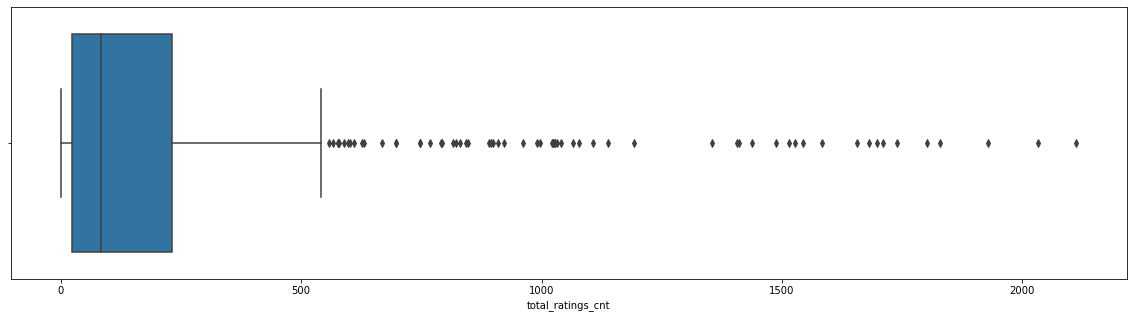

In [260]:
plt.figure(figsize = (20,5))
sns.boxplot(seller_df['total_ratings_cnt'])

#### This is much better than what we had before, we do have a lot of outliers still but lets keep them for now just fo rthe sake of not loosing much data before we could do any analysis

In [261]:
### Removing outliers from positive_ratings_cnt field
Q1, Q2, IQR = iqr(seller_df, 'positive_ratings_cnt')
seller_df = seller_df [seller_df['positive_ratings_cnt'] <= Q2 + 1.5*IQR]
seller_df.shape

(488, 13)

<AxesSubplot:xlabel='positive_ratings_cnt'>

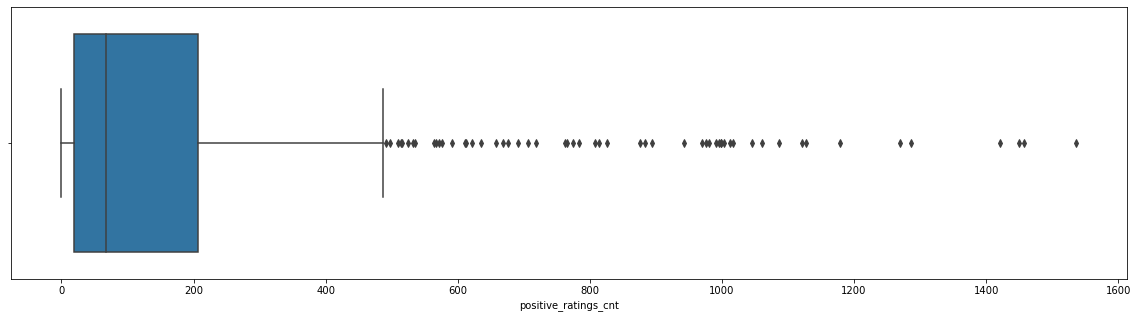

In [262]:
plt.figure(figsize = (20,5))
sns.boxplot(seller_df['positive_ratings_cnt'])

#### Same with positive_ratings_cnt we could remove a lot of outliers and get to a much better stage without actually loosing a alot of data.

In [263]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1 to 1815
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         488 non-null    datetime64[ns]
 1   category                                           488 non-null    object        
 2   seller business name                               488 non-null    object        
 3   sellerlink                                         488 non-null    object        
 4   Count of seller brands                             488 non-null    int64         
 5   sellerproductcount                                 488 non-null    float64       
 6   total_ratings_cnt                                  488 non-null    float64       
 7   positive_ratings_cnt                               488 non-null    float64       
 8   top2_product_rating

#### Now since we plan to use a recommendation algorithm for our categorization we should try and handle outliers for the other numerical columns as well since they might come in the way of acurrate analysis

<AxesSubplot:xlabel='Count of seller brands'>

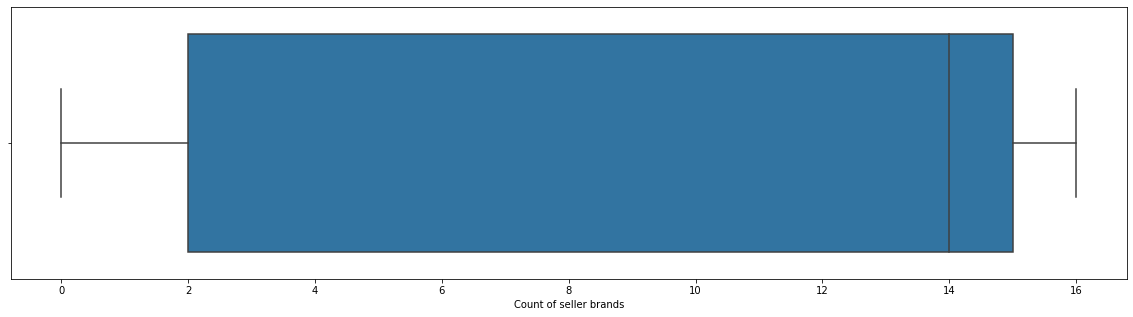

In [264]:
## Check the outliers for Count of seller brands
plt.figure(figsize = (20,5))
sns.boxplot(seller_df['Count of seller brands'])

##### No outliers as such, lets move ahead

<AxesSubplot:xlabel='top2_product_ratings_cnt'>

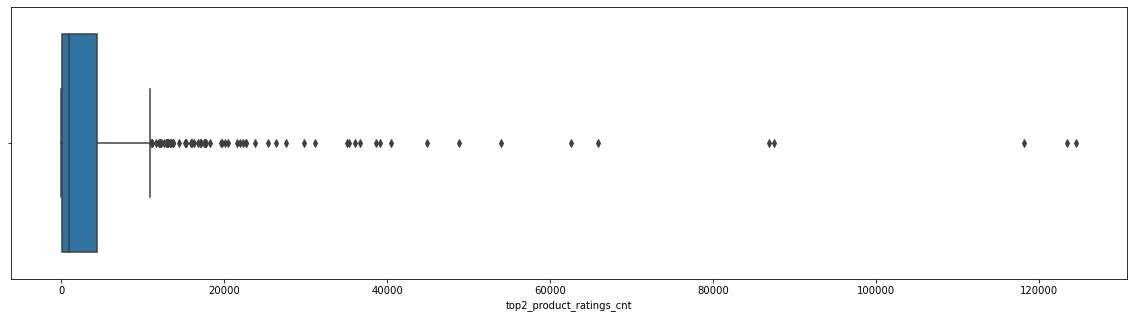

In [265]:
plt.figure(figsize = (20,5))
sns.boxplot(seller_df['top2_product_ratings_cnt'])

##### Quite a lot of outliers which might impact our analysis going forward, so we need to remove them using the same IQR method

In [266]:
### Removing outliers from top2_product_ratings_cnt field
Q1, Q2, IQR = iqr(seller_df, 'top2_product_ratings_cnt')
seller_df = seller_df [seller_df['top2_product_ratings_cnt'] <= Q2 + 1.5*IQR]
seller_df.shape

(471, 13)

<AxesSubplot:xlabel='top2_product_ratings_cnt'>

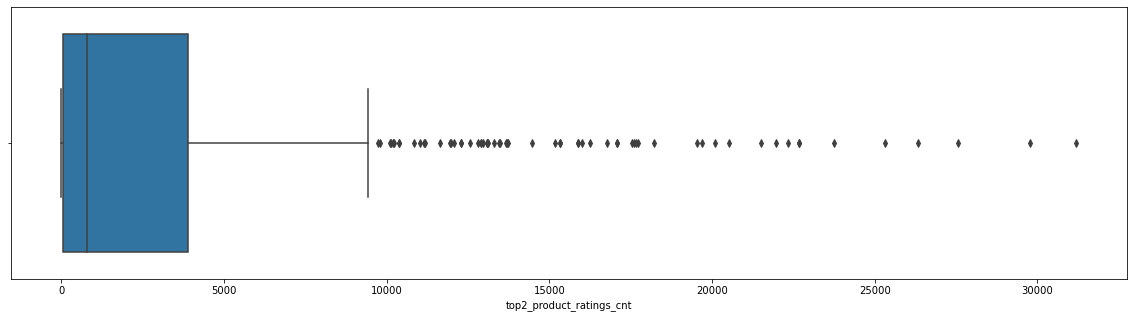

In [267]:
### Checking back again for more outliers
plt.figure(figsize = (20,5))
sns.boxplot(seller_df['top2_product_ratings_cnt'])

#### Still a lot of outliers but for the sake of loss of data, lets just move on

<AxesSubplot:xlabel='Max % of negative seller ratings - last 12 months'>

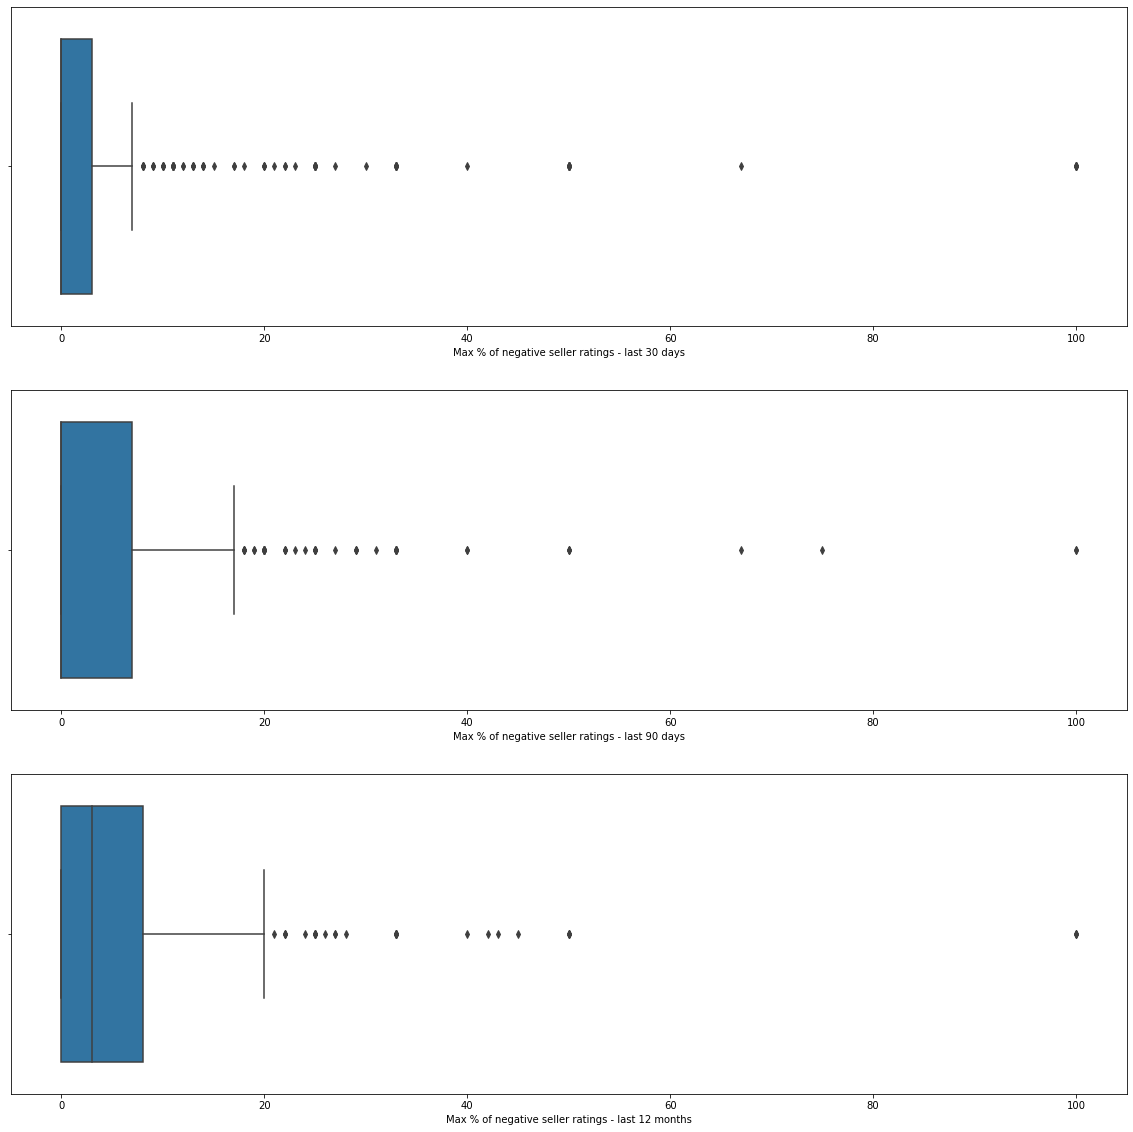

In [268]:
### Checking back again for more outliers for negetive outliers %

plt.figure(figsize = (20,20))
plt.subplot(3,1,1)

sns.boxplot(seller_df['Max % of negative seller ratings - last 30 days'])


plt.subplot(3,1,2)

sns.boxplot(seller_df['Max % of negative seller ratings - last 90 days'])

plt.subplot(3,1,3)

sns.boxplot(seller_df['Max % of negative seller ratings - last 12 months'])

                    
                    

##### All 3 columns have outliers, let handle them using the same procedure using IQR

In [269]:
### Removing outliers

Q1, Q2, IQR = iqr(seller_df, 'Max % of negative seller ratings - last 30 days')
seller_df = seller_df [seller_df['Max % of negative seller ratings - last 30 days'] <= Q2 + 1.5*IQR]

Q1, Q2, IQR = iqr(seller_df,  'Max % of negative seller ratings - last 90 days')
seller_df = seller_df [seller_df[ 'Max % of negative seller ratings - last 90 days'] <= Q2 + 1.5*IQR]

Q1, Q2, IQR = iqr(seller_df, 'Max % of negative seller ratings - last 12 months')
seller_df = seller_df [seller_df['Max % of negative seller ratings - last 12 months'] <= Q2 + 1.5*IQR]

seller_df.shape

(439, 13)

<AxesSubplot:xlabel='Max % of negative seller ratings - last 12 months'>

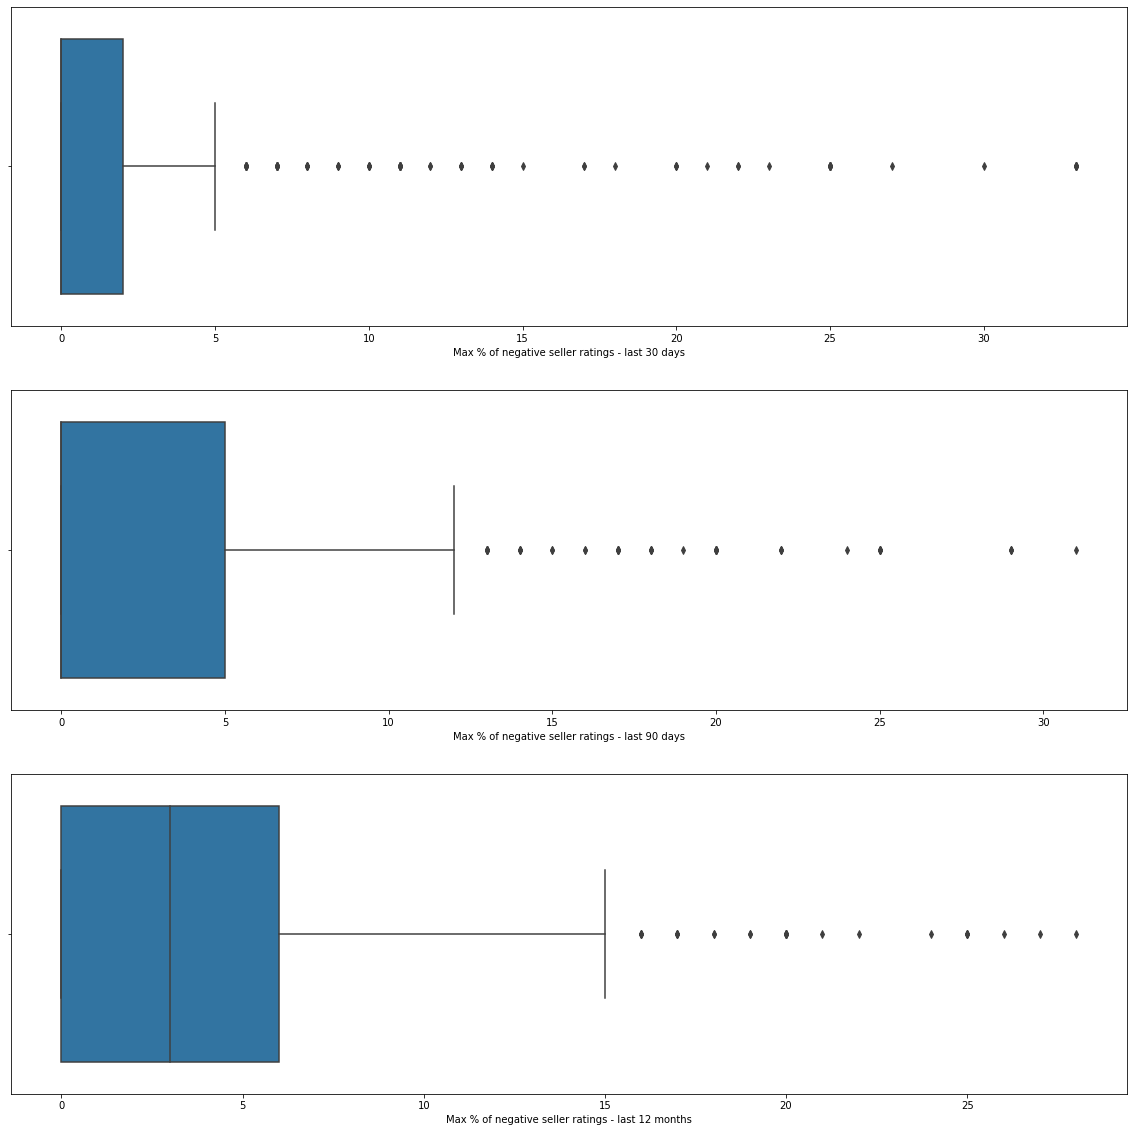

In [270]:
### Checking back again for outliers for negetive outliers %

plt.figure(figsize = (20,20))
plt.subplot(3,1,1)

sns.boxplot(seller_df['Max % of negative seller ratings - last 30 days'])


plt.subplot(3,1,2)

sns.boxplot(seller_df['Max % of negative seller ratings - last 90 days'])

plt.subplot(3,1,3)

sns.boxplot(seller_df['Max % of negative seller ratings - last 12 months'])

#### Now that we have a clean data in terms of nulls and outliers lets just look at the distribution of each of the numerical variables

#### Now that we have removed nulls and outliers its worth while looking at the data 

#### Before going ahead lets divide our Df into numerical and categorical Dfs so that we could use them for our univariate and multivariate analysis accordingly

In [271]:
num_df = seller_df [['Count of seller brands','sellerproductcount', 'total_ratings_cnt'
                    ,'positive_ratings_cnt','top2_product_ratings_cnt',
                    'Max % of negative seller ratings - last 30 days',
                    'Max % of negative seller ratings - last 90 days',
                    'Max % of negative seller ratings - last 12 months'
                   ]]
cat_df = seller_df[['category','seller_country']]

#### Analyzing the data on the basis of present numerical and categorical variables to look at our 3 KPIs defined above:

##### 1. Number of positive ratings - positive_ratings_cnt
##### 2. Total number of products listed - sellerproductcount
##### 3. Number of ratings for hero products

In [272]:
### Top 100 businesses with max positive_ratings_cnt

top_df = seller_df.nlargest(100, 'positive_ratings_cnt')
top_df = top_df.sort_values(by = 'positive_ratings_cnt', ascending = False)
positive_ratings_df =top_df[['seller business name','sellerlink','positive_ratings_cnt']]
positive_ratings_df.head(10)

,seller business name,sellerlink,positive_ratings_cnt
493,Otto Röhrs GmbH,Seller 494,1536.0
25,boni-shop.com OHG,Seller 26,1458.0
165,Pawel Knajp,Seller 166,1450.0
829,RAPIDPACK GmbH,Seller 830,1421.0
1053,wortek GmbH,Seller 1054,1286.0
386,Johann Haslberger,Seller 387,1269.0
363,mk Objektmöbel GmbH,Seller 364,1179.0
65,K A Parts Limited,Seller 66,1127.0
581,"Textilpoint24, Michael Liebal",Seller 582,1121.0
717,tradingbay24 GmbH,Seller 718,1086.0


In [273]:
### identifying top 100 businesses with highest sellerproductcount

top_df = seller_df.nlargest(100, 'sellerproductcount')
top_df = top_df.sort_values(by = 'sellerproductcount', ascending = False)
sellerproductcount_df =top_df[['seller business name','sellerlink','sellerproductcount']]
sellerproductcount_df.head(10)

,seller business name,sellerlink,sellerproductcount
101,"Klaus Kirchgatterer, Engelbert Bachfischer GbR",Seller 102,20000.0
195,KS Licht- u. Elektrotechnik GmbH,Seller 196,20000.0
755,Tudela Trading S.L.,Seller 756,20000.0
937,Wallario GmbH,Seller 938,20000.0
188,KRISSY ART LIMITED,Seller 189,20000.0
831,NATURA-Fachbuchhandlung Inh. Holger Mehlhardt ...,Seller 832,10000.0
972,tasko Products GmbH,Seller 973,10000.0
966,WBP-Express GmbH,Seller 967,10000.0
952,CULCHETH TRADING LTD,Seller 953,10000.0
876,VISO TRADE s.r.o.,Seller 877,10000.0


In [274]:
#### Identifying sellers with highest number for ratings for the hero products

top_df = seller_df.nlargest(100, 'top2_product_ratings_cnt')
top_df = top_df.sort_values(by = 'top2_product_ratings_cnt', ascending = False)
top2_product_ratings_cnt_df =top_df[['seller business name','sellerlink','top2_product_ratings_cnt']]
top2_product_ratings_cnt_df.head(10)

,seller business name,sellerlink,top2_product_ratings_cnt
386,Johann Haslberger,Seller 387,31185
1505,Zatu Limited,Seller 1506,29767
264,"Michael Milz, Inhaber Irene Koser",Seller 265,27569
111,"Kinderwelt Hitzler, Inh. Hans Hitzler eK",Seller 112,26322
281,click-licht.de GmbH & Co. KG,Seller 282,25330
829,RAPIDPACK GmbH,Seller 830,23757
388,Lorde Mall s.r.o.,Seller 389,22670
876,VISO TRADE s.r.o.,Seller 877,22668
110,V'ronis Kinderland,Seller 111,22318
280,LeuchtenZentrale GmbH,Seller 281,21970


#### Although we saw the top 100 sellers based on the 3 metrics that we had designed, but there were very few common names in those, it could also be possible that due to the large amount of outliers the commons names are not present, lets combine these lists by joining on sellerlink and see what are the common names that come in the list of top 100s. That list will be our final list where we have sellers which are leading all the rankings of these metrics. 

In [275]:
### Joining positive ratings and sellerproduct count first 
merge_df = pd.merge(positive_ratings_df, top2_product_ratings_cnt_df, how = 'inner', on = 'sellerlink')
merge_df.shape

(33, 5)

In [276]:
### Joining with sellerproductcount now

final_seller_df = pd.merge(sellerproductcount_df, merge_df, how = 'inner', on = 'sellerlink')
final_seller_df.shape

(17, 7)

In [277]:
#### Dropping extra columns out of the df

final_seller_df.drop(['seller business name_x','seller business name_y'], axis = 1, inplace = True)


final_seller_df

,seller business name,sellerlink,sellerproductcount,positive_ratings_cnt,top2_product_ratings_cnt
0,tasko Products GmbH,Seller 973,10000.0,536.0,15889
1,WBP-Express GmbH,Seller 967,10000.0,691.0,20077
2,Autoteile Jakobs GmbH,Seller 841,10000.0,287.0,17080
3,Johann Haslberger,Seller 387,10000.0,1269.0,31185
4,click-licht.de GmbH & Co. KG,Seller 282,10000.0,312.0,25330
5,International Systems and Equipment Ltd.,Seller 36,10000.0,766.0,9256
6,Geschenke Direkt GmbH,Seller 539,9000.0,491.0,13444
7,The Quilted Bear Ltd,Seller 597,7000.0,635.0,9422
8,World Trading Net GmbH & Co. KG,Seller 1052,5000.0,894.0,12057
9,LUV Trading UG (haftungsbeschränkt),Seller 449,5000.0,289.0,4317


In [278]:
## Sorting the df based on the metrics in the highest order of importance

final_seller_df = final_seller_df.sort_values(by = ['top2_product_ratings_cnt','positive_ratings_cnt','sellerproductcount'], ascending = [False, False, False])
final_seller_df

,seller business name,sellerlink,sellerproductcount,positive_ratings_cnt,top2_product_ratings_cnt
3,Johann Haslberger,Seller 387,10000.0,1269.0,31185
4,click-licht.de GmbH & Co. KG,Seller 282,10000.0,312.0,25330
10,RAPIDPACK GmbH,Seller 830,3000.0,1421.0,23757
1,WBP-Express GmbH,Seller 967,10000.0,691.0,20077
2,Autoteile Jakobs GmbH,Seller 841,10000.0,287.0,17080
0,tasko Products GmbH,Seller 973,10000.0,536.0,15889
6,Geschenke Direkt GmbH,Seller 539,9000.0,491.0,13444
13,Lubalo UG (haftungsbeschränkt),Seller 418,2000.0,514.0,12907
14,Kurt24,Seller 219,2000.0,288.0,12804
15,Kirchner GmbH,Seller 128,2000.0,251.0,12571


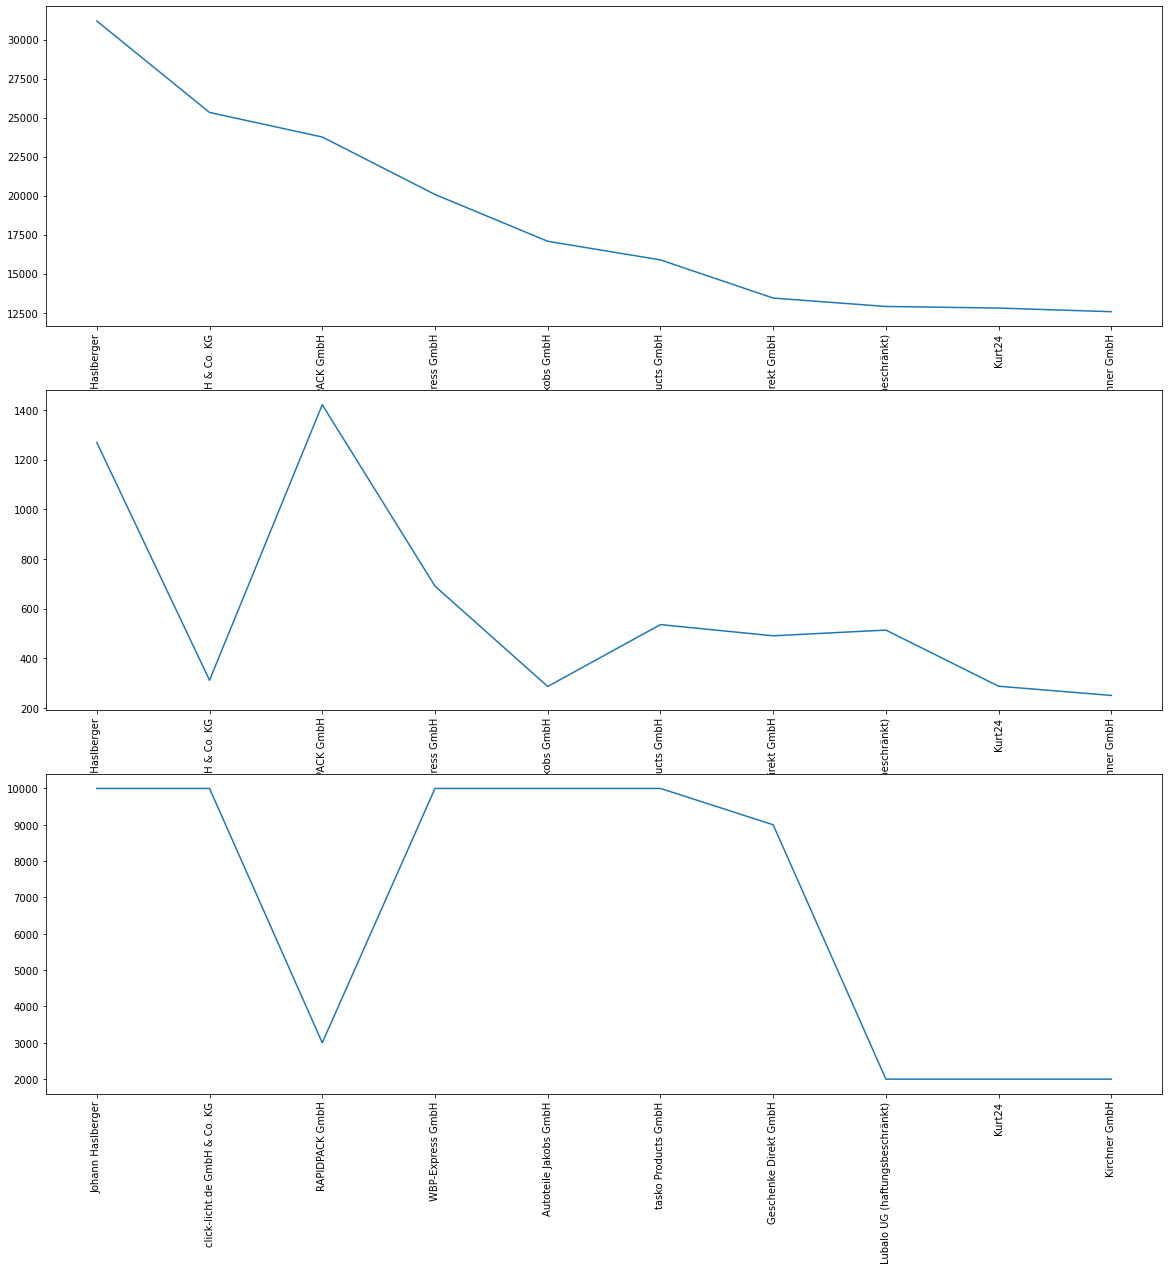

In [279]:
#### Creating visualizatiosn for the to 5 sellers from the list above
top_10 = final_seller_df.head(10)
plt.figure(figsize = (20,20))


plt.subplot(3,1,1)
plt.xticks(rotation = 90)
plt.plot(top_10['seller business name'], top_10['top2_product_ratings_cnt'])

plt.subplot(3,1,2)
plt.xticks(rotation = 90)
plt.plot(top_10['seller business name'], top_10['positive_ratings_cnt'])


plt.subplot(3,1,3)
plt.xticks(rotation = 90)
plt.plot(top_10['seller business name'], top_10['sellerproductcount'])

#### This is our final list of sellers that we need to work on validating for acquisition. The list has been sorted on top2 product ratings and then by positive ratings count and then by seller product count. This is because top 2 product ratings has the least standard deviation, meaning least amount of outliers skewing the results, moreover, top 2 product ratings is the most important metric for us, as we have positive ratings count only for last 12 months, it does not give us an idea before that whereas top2 product ratings is lifetime field.

#### Final Criteria for selection : List down top 100 sellers for each KPI and then whatever common sellers are present use them for acquisition. 

#### Now this might mss out on certain sellers which have exceptional one of the KPIs but not others and if business and product teams want to look at those we have provided them the top 10 list as well above, they could use them to validate as well.

#### Finally i feel we did an okay job in identifying the top sellers by a simple descriptive analysis method, but still lets go ahead and cluster the sellers and analyse them on the basis of these 3 KPIs. This cluster will also help us recommend whether a new seller would be likely to be in the cluster where acquisition can be made or not. We would be using a K-means clustering approach for the same.

In [280]:
#### identifying the columns in the numerical df which we separated from the seller df
num_col = num_df.columns
num_col

Index(['Count of seller brands', 'sellerproductcount', 'total_ratings_cnt',
       'positive_ratings_cnt', 'top2_product_ratings_cnt',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months'],
      dtype='object')

#### Before we start of with our K means clustering, lets list down all the assumptions of the algorithm:

    1. Numerical Variables only
    2. No noise or outliers
    3. Symmetrical distribution
    4. Scaled features
    5. No collinearity ( since if 2 variables repesent the same thing, its not valuable in a segmentation algorithm)

#### Steps we will follow for K-means algorithm:

    1. Assure that the assumptions are being followed
    2. Scale the data using Standard Scaler
    3. Use Hopkin statistic to measure the tendency of data to make clusters
    4. Modelling using sklearn
    5. Cluster Analysis and Visualizations
    

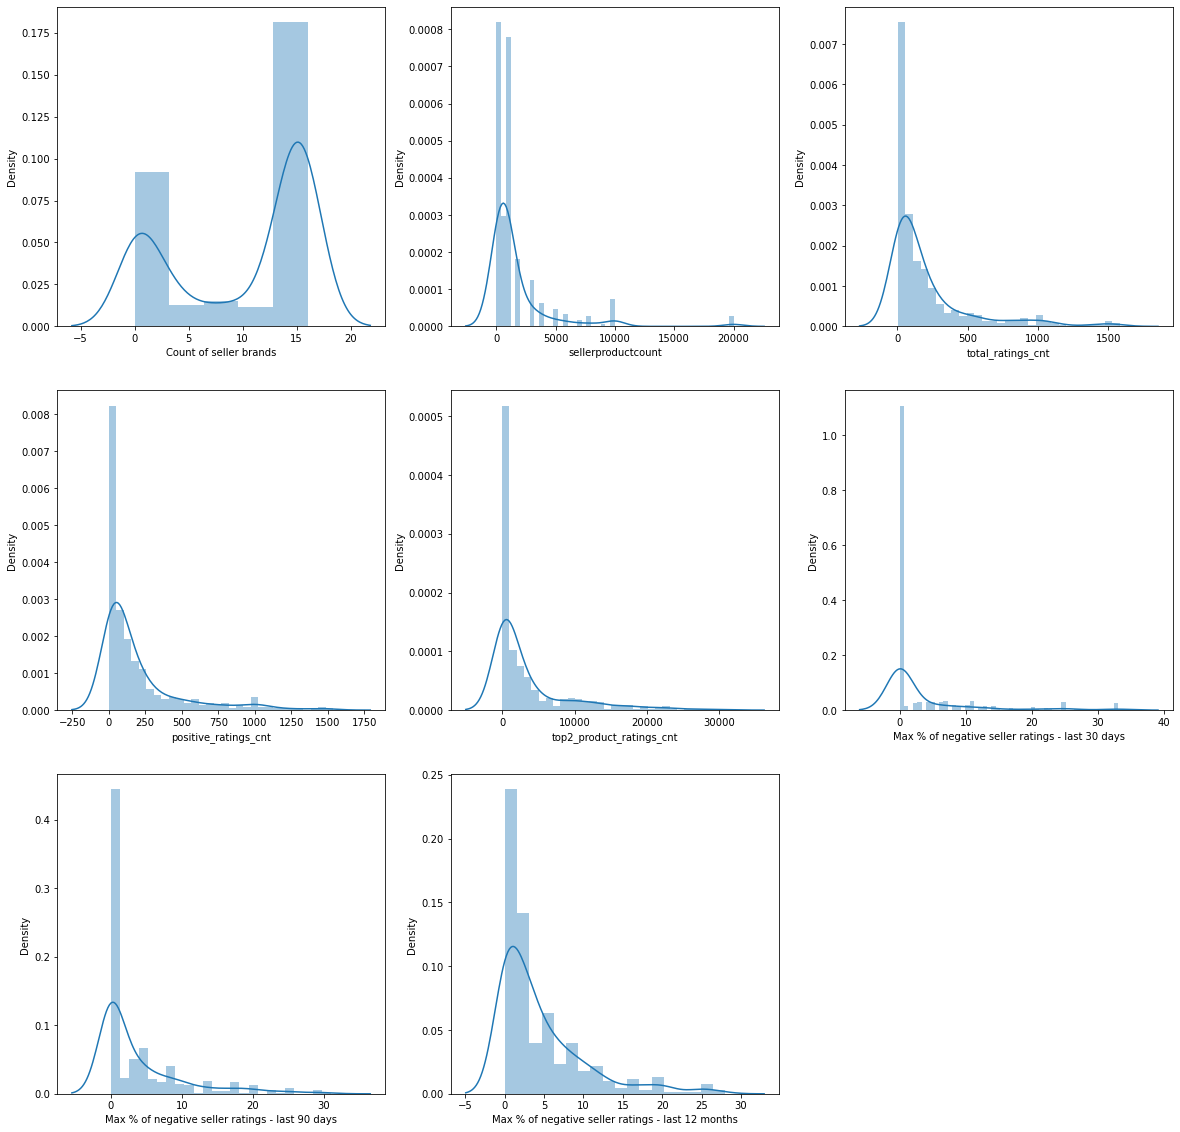

In [281]:
### plotting distplots for each of these to look at the distribution 

plt.figure(figsize = (20,20))
for i in enumerate(num_col):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(num_df[i[1]])

##### Even though we see the distributions not very symmetric, initial values are too much and then they decrease as the values go up, let go ahead and create clusters and profile them using our 3 KPIs - Positive Ratings, Total Products, Top 2 products ratings |

In [282]:
# Finding correlations between the variables

num_df.corr()

,Count of seller brands,sellerproductcount,total_ratings_cnt,positive_ratings_cnt,top2_product_ratings_cnt,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months
Count of seller brands,1.000000,0.217288,0.041312,0.044350,0.449627,0.056936,0.056858,0.052663
sellerproductcount,0.217288,1.000000,0.148668,0.146890,0.364376,0.053766,0.097621,0.147388
total_ratings_cnt,0.041312,0.148668,1.000000,0.996406,0.180128,0.205366,0.115573,0.015181
positive_ratings_cnt,0.044350,0.146890,0.996406,1.000000,0.180027,0.177635,0.087618,-0.021361
top2_product_ratings_cnt,0.449627,0.364376,0.180128,0.180027,1.000000,0.046512,0.115831,0.105699
Max % of negative seller ratings - last 30 days,0.056936,0.053766,0.205366,0.177635,0.046512,1.000000,0.648765,0.343852
Max % of negative seller ratings - last 90 days,0.056858,0.097621,0.115573,0.087618,0.115831,0.648765,1.000000,0.571733
Max % of negative seller ratings - last 12 months,0.052663,0.147388,0.015181,-0.021361,0.105699,0.343852,0.571733,1.000000


<AxesSubplot:>

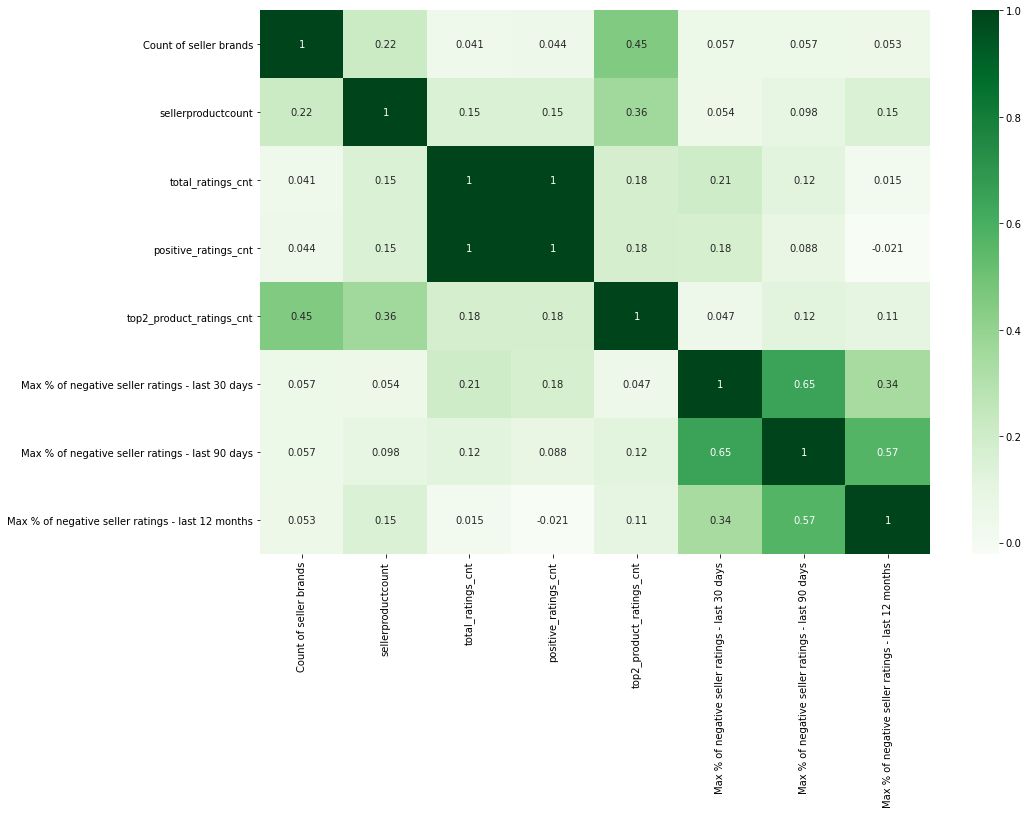

In [283]:
### Plotting heatmap using the correlations

plt.figure(figsize = (15, 10))
sns.heatmap(num_df.corr(), annot = True, cmap = 'Greens')

#### Although few of the variables are decently highly correlated lets move ahead without removing them - we do not have enough business significance that it won't impact analysis even if we remove them, hence lets go ahead with the model. But we see that total ratings and positive ratings are completely correlated and we know why as well, since positive ratinsg is derived from total ratings. Lets remove total ratings before we go ahead to scale the rest of the features

In [284]:
num_df. drop('total_ratings_cnt', axis = 1, inplace = True)

In [285]:
num_df.head()

,Count of seller brands,sellerproductcount,positive_ratings_cnt,top2_product_ratings_cnt,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months
1,0,854.0,509.0,0,2,2,9
14,15,919.0,113.0,2367,0,0,3
20,14,123.0,78.5,1624,0,0,0
21,0,854.0,167.0,0,0,7,6
24,15,3000.0,592.0,6365,3,1,2


#### Plotting some scatter plots for variables just to get an idea about their variation

<Figure size 1440x1080 with 0 Axes>

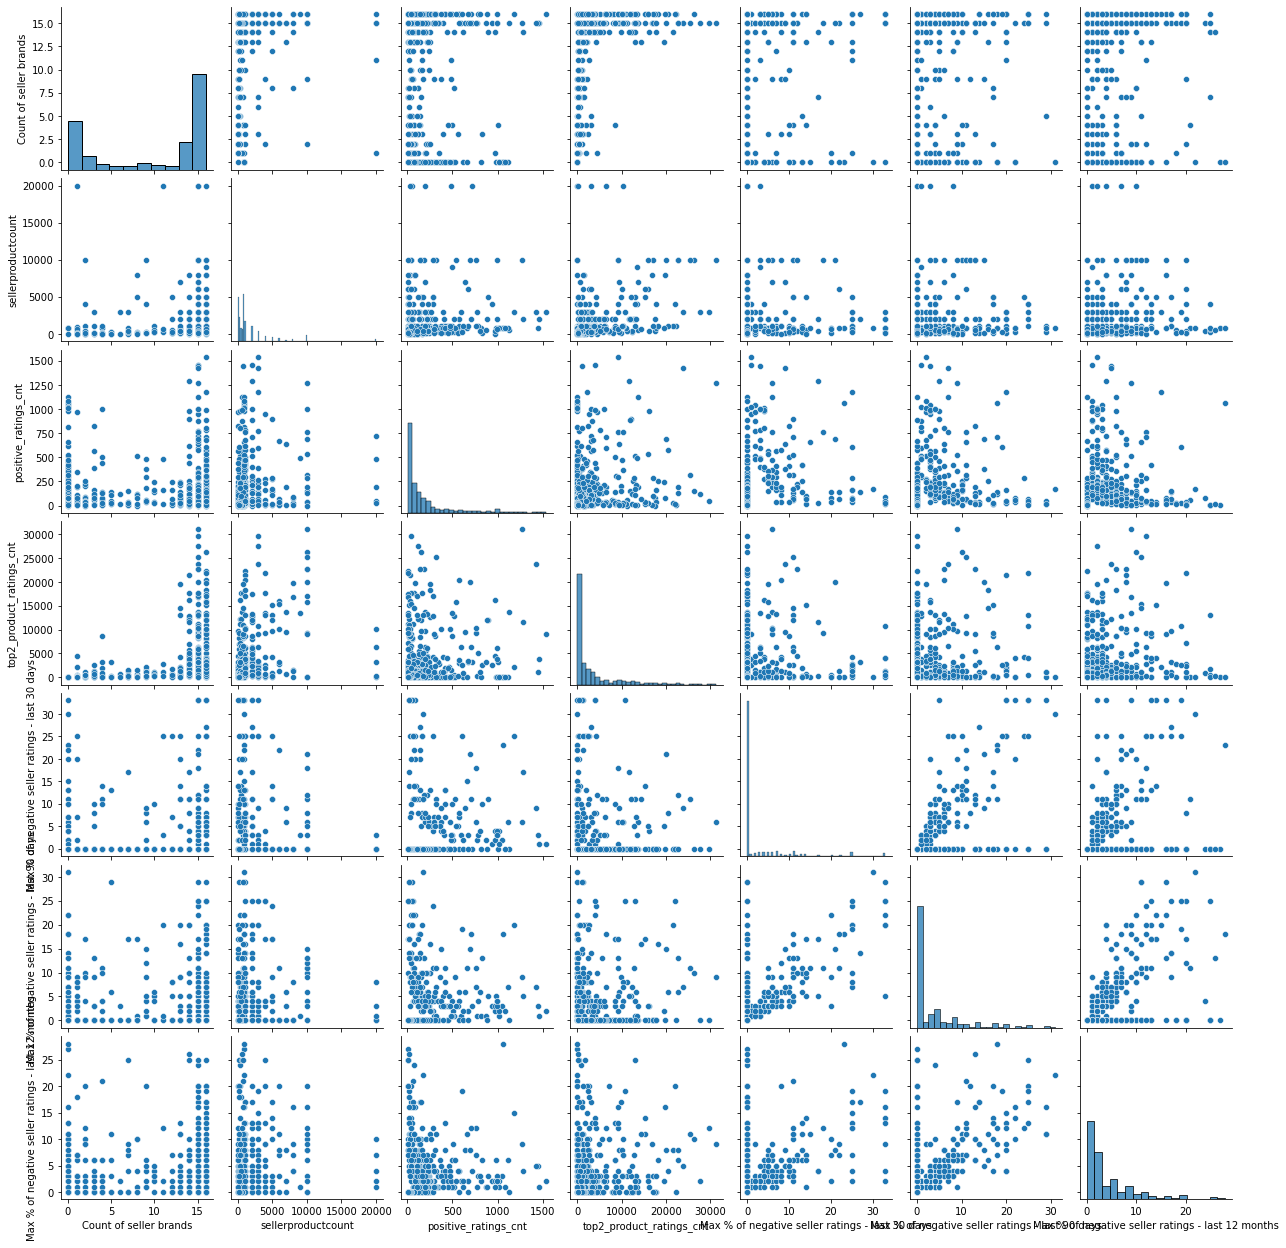

In [286]:
plt.figure(figsize = (20, 15))
sns.pairplot(num_df)

### Data Preparation for Modelling

#### Scaling the data

##### We would be scaling the data using the standard scaler since the assumption of the clustering algorithm is the data should be symmetrical and by standard scaler the data is scaled to a normalized form

#### We would be using K-means Clustering as the clustering algorithm for creating clusters and then profile them using our KPIs

In [287]:
### importing libraries needed for scaling 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Scaling 

In [288]:
scaler = StandardScaler()

In [289]:
num_scaled = scaler.fit_transform(num_df)
num_scaled

array([[-1.52185751, -0.27692822,  1.0978049 , ..., -0.15173595,
        -0.29326533,  0.79971224],
       [ 0.77610894, -0.25452934, -0.29155104, ..., -0.44518125,
        -0.61633555, -0.27610085],
       [ 0.62291118, -0.52882951, -0.41259342, ..., -0.44518125,
        -0.61633555, -0.8140074 ],
       ...,
       [ 0.77610894, -0.4730046 , -0.67748325, ..., -0.44518125,
        -0.61633555, -0.8140074 ],
       [-0.2962754 , -0.55329598, -0.63187308, ..., -0.44518125,
        -0.61633555, -0.8140074 ],
       [ 0.77610894, -0.51022121, -0.65292393, ..., -0.44518125,
        -0.61633555, -0.8140074 ]])


##### Since this is an array we need to convert it back to a df

In [290]:
num_scaled_df  = pd.DataFrame(num_scaled, columns = num_df.columns)
num_scaled_df.head()

,Count of seller brands,sellerproductcount,positive_ratings_cnt,top2_product_ratings_cnt,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months
0,-1.521858,-0.276928,1.097805,-0.611457,-0.151736,-0.293265,0.799712
1,0.776109,-0.254529,-0.291551,-0.193822,-0.445181,-0.616336,-0.276101
2,0.622911,-0.528830,-0.412593,-0.324917,-0.445181,-0.616336,-0.814007
3,-1.521858,-0.276928,-0.102093,-0.611457,-0.445181,0.514410,0.261806
4,0.776109,0.462580,1.389008,0.511588,-0.005013,-0.454800,-0.455403


#### Using describe to check whether scaling worked on not

In [291]:
num_scaled_df.describe()

,Count of seller brands,sellerproductcount,positive_ratings_cnt,top2_product_ratings_cnt,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months
count,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02
mean,-2.324134e-16,2.200214e-17,1.188621e-17,4.248689e-17,-1.428875e-16,-5.057964e-17,1.709592e-16
std,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00,1.001141e+00
min,-1.521858e+00,-5.698367e-01,-6.845002e-01,-6.114567e-01,-4.451812e-01,-6.163355e-01,-8.140074e-01
25%,-1.215462e+00,-4.855824e-01,-6.055595e-01,-5.999881e-01,-4.451812e-01,-6.163355e-01,-8.140074e-01
50%,6.229112e-01,-2.769282e-01,-4.125934e-01,-4.676576e-01,-4.451812e-01,-6.163355e-01,-2.761009e-01
75%,7.761089e-01,-2.266169e-01,9.087269e-02,7.551477e-02,-1.517360e-01,1.913400e-01,2.618057e-01
max,9.293067e-01,6.320749e+00,4.701008e+00,4.890843e+00,4.396666e+00,4.391253e+00,4.206454e+00


#### Standard deviation is 1 for all the features, so we should be good

#### Checking the cluster tendency by using hopkins statsistic 

In [292]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [293]:
hopkins(num_scaled_df)

0.8415736247306557

#### The value of Hopkins statistics is very high and therefore, we should go ahead and cluster the data, also the steps to be followed are:

##### 1. Find out the optimum value of clusters using the elbow method and silhouette score 
##### 2. Use this cluster value to create a model 
##### 3. Use the model on the data and then visualise the clusters using the KPIs

#### Elbow Method

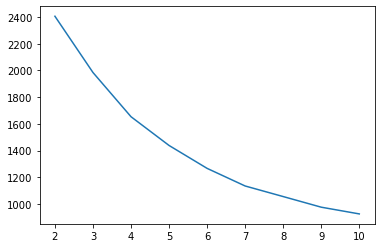

In [294]:
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(num_scaled_df)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

#### From the graph we see that 4 or 5 could be optimal value as SSD ( Sum of squared distances) do not drop significantly with increase in cluster value

### Modelling

In [295]:
# final model with k= 4
kmeans = KMeans(n_clusters=4, max_iter=50, random_state = 42)
kmeans.fit(num_scaled_df)

KMeans(max_iter=50, n_clusters=4, random_state=42)

In [296]:
seller_df['cluster_id']  = kmeans.labels_
seller_df.head()

,Date Added,category,seller business name,sellerlink,Count of seller brands,sellerproductcount,total_ratings_cnt,positive_ratings_cnt,top2_product_ratings_cnt,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,seller_country,cluster_id
1,2020-11-15,Garden,1a-Handelsagentur,Seller 2,0,854.0,566.0,509.0,0,2,2,9,DE,2
14,2020-11-15,Garden,Oliver Mills,Seller 15,15,919.0,116.0,113.0,2367,0,0,3,DE,1
20,2020-11-15,Garden,All Terrain Ireland,Seller 21,14,123.0,86.0,78.5,1624,0,0,0,Others,1
21,2020-11-15,Garden,GURU 2016 GmbH,Seller 22,0,854.0,181.0,167.0,0,0,7,6,Others,2
24,2020-11-15,Garden,Jörg Müller & Petra Scheerer GbR,Seller 25,15,3000.0,610.0,592.0,6365,3,1,2,DE,1


In [297]:
count_value(seller_df,'cluster_id')

1    195
2    141
3     52
0     51
Name: cluster_id, dtype: int64

### Visualizations post clustering to interpret the clusters and choose our recommendation

<AxesSubplot:xlabel='positive_ratings_cnt', ylabel='top2_product_ratings_cnt'>

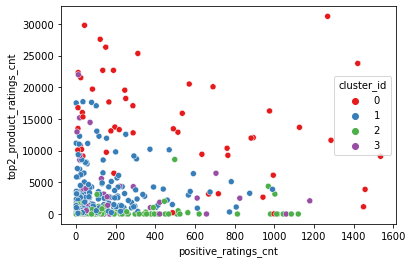

In [298]:
sns.scatterplot(x = 'positive_ratings_cnt', y ='top2_product_ratings_cnt', hue = 'cluster_id', data = seller_df, palette = 'Set1')



#### When we cluster the data and profile it based on positive ratings cnt and top 2 product rantings cnt we find that cluster 0 is best suited for our analysis as either it has very high values of top 2 product ratings cnt or very high ratings of positive ratings cnt, and ideally we would prefer both together but this cluster does a god job in clubbing them together

<AxesSubplot:xlabel='positive_ratings_cnt', ylabel='sellerproductcount'>

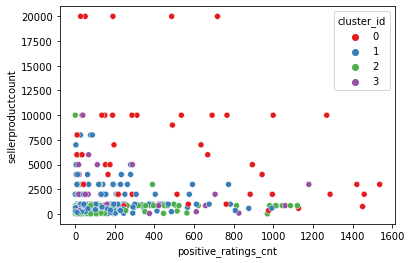

In [299]:
sns.scatterplot(x = 'positive_ratings_cnt', y ='sellerproductcount', hue = 'cluster_id', data = seller_df, palette = 'Set1')



#### When we profile our clusters based on seller product count and positive ratings we again find that the cluster 0 to fit our criteria of high seller prodoct count or high positive ratings count well. Altough we would have preferred both together but since cluster 0 has both either of the high values, lets go ahead with cluster 0

<AxesSubplot:xlabel='sellerproductcount', ylabel='top2_product_ratings_cnt'>

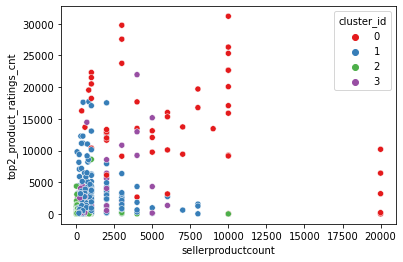

In [300]:
sns.scatterplot(x = 'sellerproductcount', y ='top2_product_ratings_cnt', hue = 'cluster_id', data = seller_df, palette = 'Set1')


#### Cluster 0 here agiain is preferred as it signifies high top 2 product count and high seller product count which is the best combination we need

<AxesSubplot:xlabel='Count of seller brands', ylabel='top2_product_ratings_cnt'>

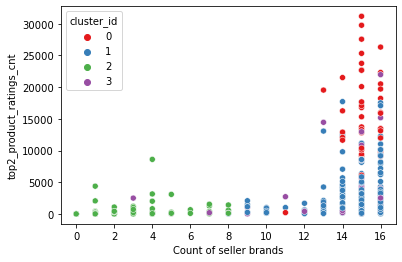

In [301]:
sns.scatterplot(x = 'Count of seller brands', y ='top2_product_ratings_cnt', hue = 'cluster_id', data = seller_df, palette = 'Set1')


#### Here also we would prefer cluster 0 as it has both the highest count of brands and top_product_ratings_cnt

#### Lets build some more visualizations to look at the clusters

<AxesSubplot:xlabel='cluster_id', ylabel='sellerproductcount'>

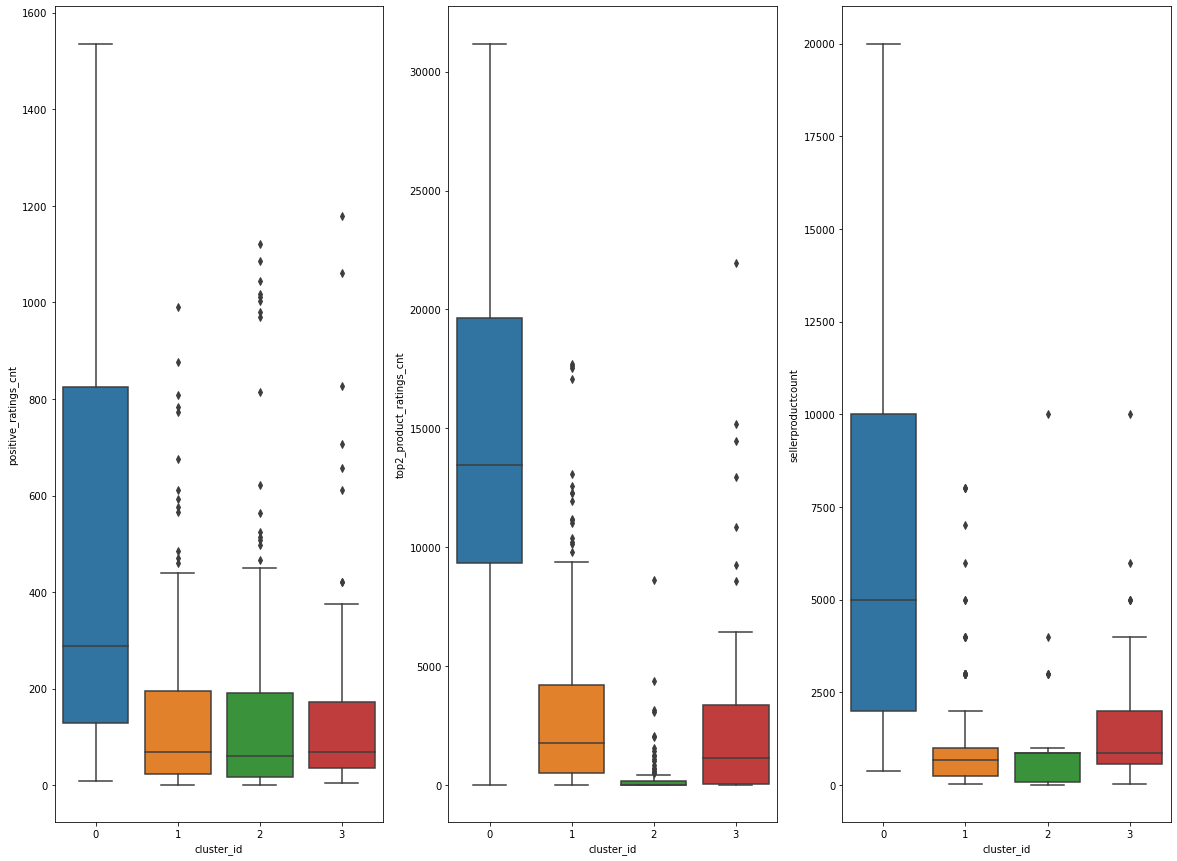

In [302]:
plt.figure(figsize = (20,15))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='positive_ratings_cnt', data= seller_df)



  
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='top2_product_ratings_cnt', data= seller_df)


  
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='sellerproductcount', data= seller_df)

#### Cluster 0 has the max good product ratings cnt, great top2 product ratings cnt and seller product count.  We will use this for our recommendation

<AxesSubplot:xlabel='cluster_id', ylabel='Max % of negative seller ratings - last 30 days'>

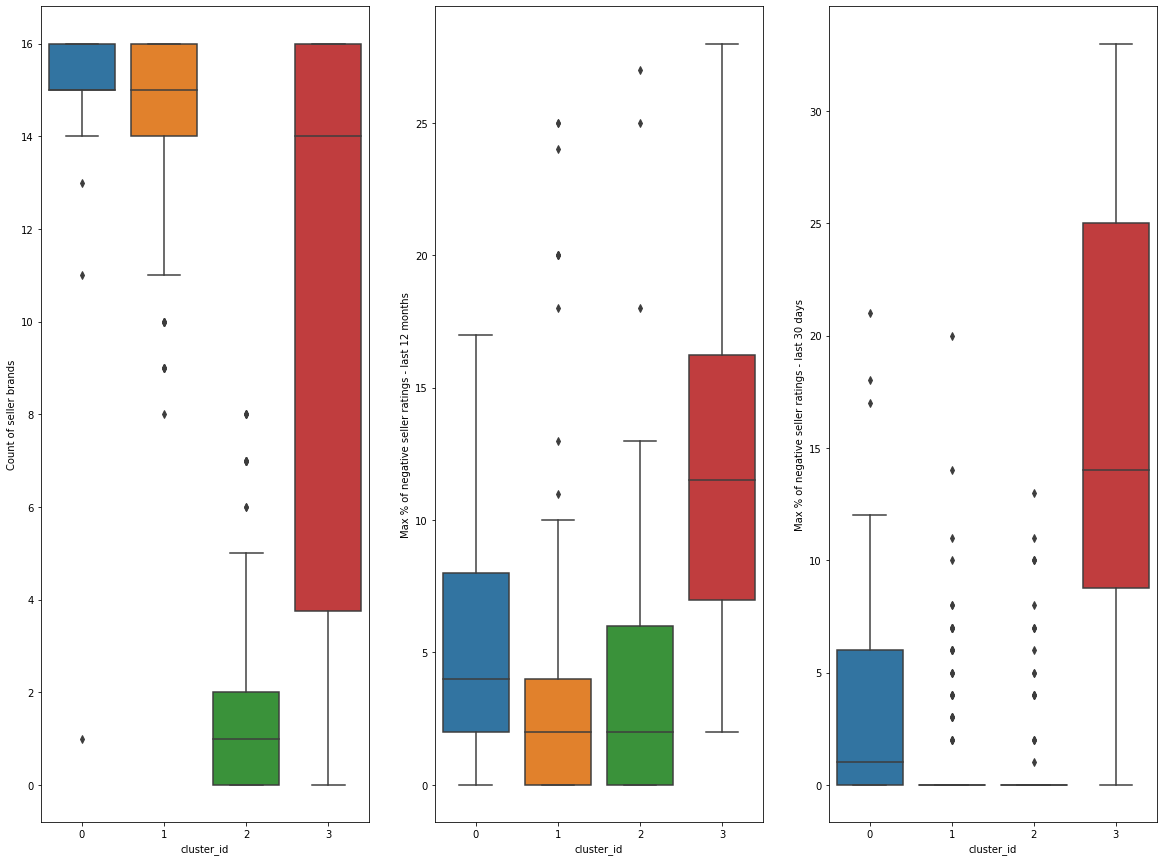

In [303]:
plt.figure(figsize = (20,15))
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id', y='Count of seller brands', data= seller_df)



  
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id', y='Max % of negative seller ratings - last 12 months', data= seller_df)


  
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='Max % of negative seller ratings - last 30 days', data= seller_df)

#### Here we see that cluster 0 has the max count of seller brands which is good, But cluster 1 has lowest % of negetive reviews in the last 12 months and 1 month. Cluster 0 is not bad either but cluster 1 is better. Lets use cluster 0 only since it has better performance on other KPIs as seen above

##### Filtering data for cluster 0 

In [304]:
cluster_df = seller_df[seller_df['cluster_id']== 0]
cluster_df.shape

(51, 14)

In [305]:
cluster_df.head()

,Date Added,category,seller business name,sellerlink,Count of seller brands,sellerproductcount,total_ratings_cnt,positive_ratings_cnt,top2_product_ratings_cnt,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,seller_country,cluster_id
25,2020-11-15,Garden,boni-shop.com OHG,Seller 26,15,2000.0,1488.0,1458.0,3887,1,1,1,DE,0
35,2020-11-15,Garden,International Systems and Equipment Ltd.,Seller 36,15,10000.0,891.0,766.0,9256,18,11,12,Others,0
56,2020-11-15,Garden,Schindler+Hofmann GmbH & Co. KG,Seller 57,15,4000.0,962.0,943.0,2655,1,3,2,DE,0
65,2020-11-15,Garden,K A Parts Limited,Seller 66,15,579.0,1138.0,1127.0,13675,0,0,0,GB,0
101,2020-11-15,Garden,"Klaus Kirchgatterer, Engelbert Bachfischer GbR",Seller 102,15,20000.0,748.0,718.0,3193,0,3,4,DE,0


<AxesSubplot:xlabel='seller_country', ylabel='count'>

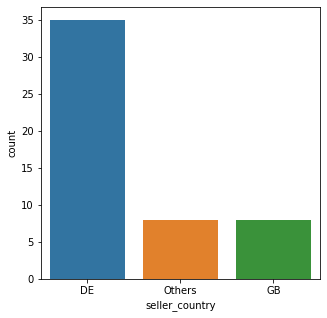

In [306]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'seller_country', data = cluster_df)

#### We see that most of the sellers we recommend are from Germany and then from Britain

In [307]:
final_seller_reco = cluster_df [['seller business name', 'sellerlink','sellerproductcount', 'positive_ratings_cnt', 'top2_product_ratings_cnt']]
final_seller_reco.sort_values(by = ['positive_ratings_cnt','top2_product_ratings_cnt','sellerproductcount'], ascending = [False, False, False], inplace = True)
final_seller_reco.head(20)

,seller business name,sellerlink,sellerproductcount,positive_ratings_cnt,top2_product_ratings_cnt
493,Otto Röhrs GmbH,Seller 494,3000.0,1536.0,9102
25,boni-shop.com OHG,Seller 26,2000.0,1458.0,3887
165,Pawel Knajp,Seller 166,764.0,1450.0,1141
829,RAPIDPACK GmbH,Seller 830,3000.0,1421.0,23757
1053,wortek GmbH,Seller 1054,2000.0,1286.0,11633
386,Johann Haslberger,Seller 387,10000.0,1269.0,31185
65,K A Parts Limited,Seller 66,579.0,1127.0,13675
831,NATURA-Fachbuchhandlung Inh. Holger Mehlhardt ...,Seller 832,10000.0,999.0,27
1766,Zombolo GmbH,Seller 1767,2000.0,995.0,6122
852,Viola Direkt GmbH,Seller 853,364.0,976.0,16258


In [308]:
### bringing in our final seller DFs from desriptive analytics

final_seller_df

,seller business name,sellerlink,sellerproductcount,positive_ratings_cnt,top2_product_ratings_cnt
3,Johann Haslberger,Seller 387,10000.0,1269.0,31185
4,click-licht.de GmbH & Co. KG,Seller 282,10000.0,312.0,25330
10,RAPIDPACK GmbH,Seller 830,3000.0,1421.0,23757
1,WBP-Express GmbH,Seller 967,10000.0,691.0,20077
2,Autoteile Jakobs GmbH,Seller 841,10000.0,287.0,17080
0,tasko Products GmbH,Seller 973,10000.0,536.0,15889
6,Geschenke Direkt GmbH,Seller 539,9000.0,491.0,13444
13,Lubalo UG (haftungsbeschränkt),Seller 418,2000.0,514.0,12907
14,Kurt24,Seller 219,2000.0,288.0,12804
15,Kirchner GmbH,Seller 128,2000.0,251.0,12571


##### Lets combine our lists from recommendation and from decriptive analytics and see how many of them are common 

In [309]:
df_comb = pd.merge(final_seller_reco, final_seller_df, how = 'inner', on ='sellerlink')
df_comb

,seller business name_x,sellerlink,sellerproductcount_x,positive_ratings_cnt_x,top2_product_ratings_cnt_x,seller business name_y,sellerproductcount_y,positive_ratings_cnt_y,top2_product_ratings_cnt_y
0,Otto Röhrs GmbH,Seller 494,3000.0,1536.0,9102,Otto Röhrs GmbH,3000.0,1536.0,9102
1,RAPIDPACK GmbH,Seller 830,3000.0,1421.0,23757,RAPIDPACK GmbH,3000.0,1421.0,23757
2,Johann Haslberger,Seller 387,10000.0,1269.0,31185,Johann Haslberger,10000.0,1269.0,31185
3,World Trading Net GmbH & Co. KG,Seller 1052,5000.0,894.0,12057,World Trading Net GmbH & Co. KG,5000.0,894.0,12057
4,International Systems and Equipment Ltd.,Seller 36,10000.0,766.0,9256,International Systems and Equipment Ltd.,10000.0,766.0,9256
5,WBP-Express GmbH,Seller 967,10000.0,691.0,20077,WBP-Express GmbH,10000.0,691.0,20077
6,The Quilted Bear Ltd,Seller 597,7000.0,635.0,9422,The Quilted Bear Ltd,7000.0,635.0,9422
7,tasko Products GmbH,Seller 973,10000.0,536.0,15889,tasko Products GmbH,10000.0,536.0,15889
8,Lubalo UG (haftungsbeschränkt),Seller 418,2000.0,514.0,12907,Lubalo UG (haftungsbeschränkt),2000.0,514.0,12907
9,Geschenke Direkt GmbH,Seller 539,9000.0,491.0,13444,Geschenke Direkt GmbH,9000.0,491.0,13444


#### We see 12 out of the 17 sellers are common, which is decent given the amount of limited data and features we have. This is the recommended list for business to go on validate for acquisition. 

#### Just to summarize, our criterio for descriptive analytics was :  find out top 100 of best positive ratings, best seller product count and best top 2 product ratings count and find out common sellers from all these 3 lists

#### Our criteria using statistical modelling was to build a K means clustering model and create clusters - Clusters with highest positive ratings, top 2 product ratings and seller count was choosen, As and when more data flows in this mode will get better and better and more and more sellers would match from the descriptive list 